#Preparação


In [ ]:
rm ~/.kaggle/kaggle.json

rm: cannot remove '/root/.kaggle/kaggle.json': No such file or directory


In [ ]:
rmdir ~/.kaggle

rmdir: failed to remove '/root/.kaggle': No such file or directory


In [ ]:
pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import requests
from io import StringIO
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.offline as py
import plotly.graph_objs as go
import os
import shutil
from sklearn.utils import resample
from plotly.offline import plot, iplot
from google.colab import files
import cufflinks as cf 
cf.go_offline()
py.offline.init_notebook_mode(connected = True)
import plotly.io as pio
pio.renderers
pio.renderers.default = 'colab'

In [ ]:
!mkdir ~/.kaggle

api_token = {"username":"username","key":"api-key"}

import json

with open('/root/.kaggle/kaggle.json', 'w') as file:
    json.dump(api_token, file)

##Pegando os data sets de 2011





In [ ]:
import os 
os.environ['KAGGLE_CONFIG_DIR'] = '/content/sample_data'

In [ ]:
!kaggle datasets download -d arturbritosouza/fies-para-a-pesquisa

100% 1.71G/1.72G [00:19<00:00, 77.1MB/s]
100% 1.72G/1.72G [00:19<00:00, 95.2MB/s]


In [ ]:
!unzip -j "/content/fies-para-a-pesquisa.zip" "FINANCIAMENTO_CONCEDIDOS_SEMESTRE_1_2011.csv" 
!unzip -j "/content/fies-para-a-pesquisa.zip" "FINANCIAMENTO_CONCEDIDOS_SEMESTRE_2_2011.csv" 

Archive:  /content/fies-para-a-pesquisa.zip
  inflating: FINANCIAMENTO_CONCEDIDOS_SEMESTRE_1_2011.csv  
Archive:  /content/fies-para-a-pesquisa.zip
  inflating: FINANCIAMENTO_CONCEDIDOS_SEMESTRE_2_2011.csv  


#Colocando em datasets para analisar


In [ ]:
fields = [
'SG_UF', 'ST_DEFICIENCIA', 'DS_RACA_COR', 'ST_ENSINO_MEDIO_ESCOLA_PUBLICA', 'DS_TIPO_CURSO', 'DS_CURSO', 'DS_SEXO', 'NO_IES',
'NO_MUNICIPIO', 'NO_AGENTE_FINANCEIRO', 'DS_ESTADO_CIVIL', 'DS_PERIODICIDADE_CUR', 'NU_ANO_PROC', 'NU_MES_PROC' , 'NU_SEMESTRE',
'NU_MES',  'NU_ANO', 'TP_FIANCA', 'VL_REPASSE', 'CO_CONTRATO_FIES', 'VL_PERC_FINANCIAMENTO', 'QT_SEMESTRE_FINANCIADO', 'DT_NASCIMENTO',
'CO_PROCESSO', 'NU_ANO_EXERCICIO_INSC', 'NU_PERCENTUAL_PROUNI', 'NU_PERCENT_SOLICITADO_FINANC', 'VL_MENSALIDADE'
]

In [ ]:
df1 = pd.read_csv('FINANCIAMENTO_CONCEDIDOS_SEMESTRE_1_2011.csv', encoding="ISO-8859-1", sep = ';', usecols=fields)
df10 = pd.read_csv('FINANCIAMENTO_CONCEDIDOS_SEMESTRE_2_2011.csv', encoding="ISO-8859-1", sep = ';', usecols=fields)

In [ ]:
pd.set_option('display.max_columns', 50)
df1

,SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,TP_FIANCA,NU_ANO_EXERCICIO_INSC,NU_PERCENTUAL_PROUNI,NU_PERCENT_SOLICITADO_FINANC,VL_REPASSE,DT_NASCIMENTO,ST_DEFICIENCIA,ST_ENSINO_MEDIO_ESCOLA_PUBLICA,DS_SEXO,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC
0,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,52,159462,Caixa Econômica Federal,1,1,2011,"454,5",N,2010.0,0.0,75.0,"28988,82",08/10/1987,N,S,Feminino,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2011,6
1,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,52,159462,Caixa Econômica Federal,5,1,2011,"454,5",N,2010.0,0.0,75.0,"28988,82",08/10/1987,N,S,Feminino,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2011,6
2,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,52,159462,Caixa Econômica Federal,4,1,2011,"454,5",N,2010.0,0.0,75.0,"28988,82",08/10/1987,N,S,Feminino,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2011,6
3,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,52,159462,Caixa Econômica Federal,2,1,2011,"454,5",N,2010.0,0.0,75.0,"28988,82",08/10/1987,N,S,Feminino,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2011,6
4,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,52,159462,Caixa Econômica Federal,3,1,2011,"454,5",N,2010.0,0.0,75.0,"28988,82",08/10/1987,N,S,Feminino,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2011,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576109,TO,Guaraí,FACULDADE GUARAÍ,48,205322,Banco do Brasil,7,2,2010,"349,01",N,2010.0,0.0,90.0,"4188,13",20/08/1990,N,S,Masculino,Solteiro,Pardo,90.0,8.0,ADMINISTRAÇÃO DE EMPRESAS,Bacharelado,Semestral,2011,3
576110,TO,Guaraí,FACULDADE GUARAÍ,48,205322,Banco do Brasil,10,2,2010,"349,01",N,2010.0,0.0,90.0,"4188,13",20/08/1990,N,S,Masculino,Solteiro,Pardo,90.0,8.0,ADMINISTRAÇÃO DE EMPRESAS,Bacharelado,Semestral,2011,3
576111,TO,Guaraí,FACULDADE GUARAÍ,48,205322,Banco do Brasil,8,2,2010,"349,01",N,2010.0,0.0,90.0,"4188,13",20/08/1990,N,S,Masculino,Solteiro,Pardo,90.0,8.0,ADMINISTRAÇÃO DE EMPRESAS,Bacharelado,Semestral,2011,3
576112,TO,Guaraí,FACULDADE GUARAÍ,48,205322,Banco do Brasil,9,2,2010,"349,01",N,2010.0,0.0,90.0,"4188,13",20/08/1990,N,S,Masculino,Solteiro,Pardo,90.0,8.0,ADMINISTRAÇÃO DE EMPRESAS,Bacharelado,Semestral,2011,3


In [ ]:
pd.set_option('display.max_columns', 50)
df10

,SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,TP_FIANCA,NU_ANO_EXERCICIO_INSC,NU_PERCENTUAL_PROUNI,NU_PERCENT_SOLICITADO_FINANC,VL_REPASSE,DT_NASCIMENTO,ST_DEFICIENCIA,ST_ENSINO_MEDIO_ESCOLA_PUBLICA,DS_SEXO,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC
0,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,58,159462,Caixa Econômica Federal,7,2,2011,"454,5",N,2010.0,0.0,75.0,"28988,82",8/10/1987 00:00:00,N,S,Feminino,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2011,12
1,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,58,159462,Caixa Econômica Federal,8,2,2011,"454,5",N,2010.0,0.0,75.0,"28988,82",8/10/1987 00:00:00,N,S,Feminino,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2011,12
2,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,58,159462,Caixa Econômica Federal,10,2,2011,"454,5",N,2010.0,0.0,75.0,"28988,82",8/10/1987 00:00:00,N,S,Feminino,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2011,12
3,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,58,159462,Caixa Econômica Federal,9,2,2011,"454,5",N,2010.0,0.0,75.0,"28988,82",8/10/1987 00:00:00,N,S,Feminino,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2011,12
4,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,58,159462,Caixa Econômica Federal,11,2,2011,"454,5",N,2010.0,0.0,75.0,"28988,82",8/10/1987 00:00:00,N,S,Feminino,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2011,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1606430,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,57,353053,Caixa Econômica Federal,9,2,2011,"429,56",N,2011.0,0.0,65.0,"30172,93",10/01/1975 00:00:00,N,S,Feminino,Casado,Amarelo,65.0,8.0,ENFERMAGEM,Bacharelado,Semestral,2011,11
1606431,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,57,353053,Caixa Econômica Federal,10,2,2011,"429,56",N,2011.0,0.0,65.0,"30172,93",10/01/1975 00:00:00,N,S,Feminino,Casado,Amarelo,65.0,8.0,ENFERMAGEM,Bacharelado,Semestral,2011,11
1606432,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,57,353053,Caixa Econômica Federal,7,2,2011,"429,56",N,2011.0,0.0,65.0,"30172,93",10/01/1975 00:00:00,N,S,Feminino,Casado,Amarelo,65.0,8.0,ENFERMAGEM,Bacharelado,Semestral,2011,11
1606433,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,58,353053,Caixa Econômica Federal,11,2,2011,"429,56",N,2011.0,0.0,65.0,"30172,93",10/01/1975 00:00:00,N,S,Feminino,Casado,Amarelo,65.0,8.0,ENFERMAGEM,Bacharelado,Semestral,2011,12


In [ ]:
pd.reset_option("^display")

#Tratamento inicial.

###Crindo uma palheta de cores.

In [ ]:
cores = ['#009739', '#FEDD00', '#012169', '#FFFFFF', '#fe9e00', '#e0fe00', '#00fedd', '#0021fe', '#5e00fe', 
         '#dd00fe',  '#131000', '#898675', '#ffd4de', '#fed78d', '#867589', '#fe0021', '#00a0fe', '#3333ff',
         '#336600', '#660033', '#003a32', '#fe0060', '#260005', '#666699', '#66ff99', '#99ffcc', '#ccff99' ]

##Com os dados de 2011.1

###Retirando as repetições

In [ ]:
repeticoes = df1['CO_CONTRATO_FIES'].value_counts()
def custom_rating(contrato):
        return repeticoes[contrato]
        
df1['MESES_CONSEDIDOS'] = df1.apply(lambda x: custom_rating(x['CO_CONTRATO_FIES']),axis=1)

df1

,SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,...,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
0,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,52,159462,Caixa Econômica Federal,1,1,2011,"454,5",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2011,6,6
1,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,52,159462,Caixa Econômica Federal,5,1,2011,"454,5",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2011,6,6
2,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,52,159462,Caixa Econômica Federal,4,1,2011,"454,5",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2011,6,6
3,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,52,159462,Caixa Econômica Federal,2,1,2011,"454,5",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2011,6,6
4,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,52,159462,Caixa Econômica Federal,3,1,2011,"454,5",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2011,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576109,TO,Guaraí,FACULDADE GUARAÍ,48,205322,Banco do Brasil,7,2,2010,"349,01",...,Solteiro,Pardo,90.0,8.0,ADMINISTRAÇÃO DE EMPRESAS,Bacharelado,Semestral,2011,3,6
576110,TO,Guaraí,FACULDADE GUARAÍ,48,205322,Banco do Brasil,10,2,2010,"349,01",...,Solteiro,Pardo,90.0,8.0,ADMINISTRAÇÃO DE EMPRESAS,Bacharelado,Semestral,2011,3,6
576111,TO,Guaraí,FACULDADE GUARAÍ,48,205322,Banco do Brasil,8,2,2010,"349,01",...,Solteiro,Pardo,90.0,8.0,ADMINISTRAÇÃO DE EMPRESAS,Bacharelado,Semestral,2011,3,6
576112,TO,Guaraí,FACULDADE GUARAÍ,48,205322,Banco do Brasil,9,2,2010,"349,01",...,Solteiro,Pardo,90.0,8.0,ADMINISTRAÇÃO DE EMPRESAS,Bacharelado,Semestral,2011,3,6


In [ ]:
df1DuplicateRows = df1[df1.duplicated(subset='CO_CONTRATO_FIES')]
df1DuplicateRows

,SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,...,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
1,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,52,159462,Caixa Econômica Federal,5,1,2011,"454,5",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2011,6,6
2,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,52,159462,Caixa Econômica Federal,4,1,2011,"454,5",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2011,6,6
3,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,52,159462,Caixa Econômica Federal,2,1,2011,"454,5",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2011,6,6
4,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,52,159462,Caixa Econômica Federal,3,1,2011,"454,5",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2011,6,6
5,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,53,159462,Caixa Econômica Federal,6,1,2011,"454,5",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2011,7,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576109,TO,Guaraí,FACULDADE GUARAÍ,48,205322,Banco do Brasil,7,2,2010,"349,01",...,Solteiro,Pardo,90.0,8.0,ADMINISTRAÇÃO DE EMPRESAS,Bacharelado,Semestral,2011,3,6
576110,TO,Guaraí,FACULDADE GUARAÍ,48,205322,Banco do Brasil,10,2,2010,"349,01",...,Solteiro,Pardo,90.0,8.0,ADMINISTRAÇÃO DE EMPRESAS,Bacharelado,Semestral,2011,3,6
576111,TO,Guaraí,FACULDADE GUARAÍ,48,205322,Banco do Brasil,8,2,2010,"349,01",...,Solteiro,Pardo,90.0,8.0,ADMINISTRAÇÃO DE EMPRESAS,Bacharelado,Semestral,2011,3,6
576112,TO,Guaraí,FACULDADE GUARAÍ,48,205322,Banco do Brasil,9,2,2010,"349,01",...,Solteiro,Pardo,90.0,8.0,ADMINISTRAÇÃO DE EMPRESAS,Bacharelado,Semestral,2011,3,6


In [ ]:
df1ComLinhasDuplicads = df1
df1 = df1.drop_duplicates(subset='CO_CONTRATO_FIES')

In [ ]:
df1

,SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,...,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
0,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,52,159462,Caixa Econômica Federal,1,1,2011,"454,5",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2011,6,6
6,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,52,188322,Caixa Econômica Federal,2,1,2011,"333,28",...,Solteiro,Pardo,50.0,7.0,DIREITO,Bacharelado,Anual,2011,6,6
12,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,52,185994,Caixa Econômica Federal,2,1,2011,"303,06",...,Solteiro,Pardo,50.0,9.0,DIREITO,Bacharelado,Anual,2011,6,6
18,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,52,188732,Caixa Econômica Federal,1,1,2011,"436,29",...,Solteiro,Pardo,50.0,9.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2011,6,6
24,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,52,170526,Caixa Econômica Federal,4,1,2011,"484,9",...,Solteiro,Branco,80.0,9.0,DIREITO,Bacharelado,Anual,2011,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
576084,TO,Colinas do Tocantins,FACULDADE INTEGRADA DE ENSINO SUPERIOR DE COLINAS,53,180060,Caixa Econômica Federal,4,1,2011,"334,56",...,Solteiro,Pardo,80.0,10.0,DIREITO,Bacharelado,Semestral,2011,7,6
576090,TO,Colinas do Tocantins,FACULDADE INTEGRADA DE ENSINO SUPERIOR DE COLINAS,53,186077,Caixa Econômica Federal,2,1,2011,"267,6",...,Casado,Pardo,100.0,7.0,PEDAGOGIA,Bacharelado,Semestral,2011,7,6
576096,TO,Colinas do Tocantins,FACULDADE INTEGRADA DE ENSINO SUPERIOR DE COLINAS,53,192448,Caixa Econômica Federal,3,1,2011,"418,56",...,Solteiro,Pardo,100.0,9.0,DIREITO,Bacharelado,Semestral,2011,7,6
576102,TO,Guaraí,FACULDADE GUARAÍ,48,203007,Banco do Brasil,9,2,2010,"387,79",...,Solteiro,Branco,100.0,7.0,ADMINISTRAÇÃO DE EMPRESAS,Bacharelado,Semestral,2011,3,6


In [ ]:
df1ComLinhasDuplicads['CO_CONTRATO_FIES'].value_counts()

274446    18
204732    12
193585    12
124435    12
121375    12
          ..
238359     6
287919     6
235070     6
244311     6
205322     6
Name: CO_CONTRATO_FIES, Length: 92952, dtype: int64

###Retirando as linhas que possuem valores nulos

In [ ]:
df1.describe()

,CO_PROCESSO,CO_CONTRATO_FIES,NU_MES,NU_SEMESTRE,NU_ANO,NU_ANO_EXERCICIO_INSC,NU_PERCENTUAL_PROUNI,NU_PERCENT_SOLICITADO_FINANC,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
count,92952.000000,92952.000000,92952.000000,92952.000000,92952.000000,92947.000000,92947.000000,92947.000000,92947.000000,92947.000000,92952.0,92952.000000,92952.000000
mean,50.926769,229303.489920,3.532017,1.109756,2010.890169,2010.688295,3.240825,84.865117,84.865117,7.791838,2011.0,5.306438,6.197973
std,1.837612,55591.537331,2.631991,0.312587,0.312681,0.463216,12.307152,20.144672,20.144672,2.304487,0.0,1.253908,1.072116
min,44.000000,111186.000000,1.000000,1.000000,2010.000000,2010.000000,0.000000,50.000000,50.000000,1.000000,2011.0,2.000000,6.000000
25%,49.000000,184265.750000,2.000000,1.000000,2011.000000,2010.000000,0.000000,70.000000,70.000000,6.000000,2011.0,4.000000,6.000000
50%,51.000000,246090.500000,3.000000,1.000000,2011.000000,2011.000000,0.000000,100.000000,100.000000,8.000000,2011.0,5.000000,6.000000
75%,52.000000,273816.250000,4.000000,1.000000,2011.000000,2011.000000,0.000000,100.000000,100.000000,10.000000,2011.0,6.000000,6.000000
max,53.000000,298405.000000,12.000000,2.000000,2011.000000,2012.000000,50.000000,100.000000,100.000000,16.000000,2011.0,7.000000,18.000000


In [ ]:
df1.isnull().sum().sort_values(ascending=False)

DS_SEXO                           9
ST_ENSINO_MEDIO_ESCOLA_PUBLICA    9
ST_DEFICIENCIA                    9
DT_NASCIMENTO                     9
DS_RACA_COR                       9
DS_ESTADO_CIVIL                   9
DS_PERIODICIDADE_CUR              6
DS_TIPO_CURSO                     6
DS_CURSO                          6
NU_PERCENTUAL_PROUNI              5
NU_PERCENT_SOLICITADO_FINANC      5
VL_REPASSE                        5
NU_ANO_EXERCICIO_INSC             5
TP_FIANCA                         5
QT_SEMESTRE_FINANCIADO            5
NO_IES                            5
VL_PERC_FINANCIAMENTO             5
NU_ANO_PROC                       0
NU_MES_PROC                       0
SG_UF                             0
NO_MUNICIPIO                      0
VL_MENSALIDADE                    0
NU_ANO                            0
NU_SEMESTRE                       0
NU_MES                            0
NO_AGENTE_FINANCEIRO              0
CO_CONTRATO_FIES                  0
CO_PROCESSO                 

In [ ]:
df1.dropna(axis=0, inplace=True)

In [ ]:
df1.isnull().sum().sort_values(ascending=False)

SG_UF                             0
DT_NASCIMENTO                     0
NU_MES_PROC                       0
NU_ANO_PROC                       0
DS_PERIODICIDADE_CUR              0
DS_TIPO_CURSO                     0
DS_CURSO                          0
QT_SEMESTRE_FINANCIADO            0
VL_PERC_FINANCIAMENTO             0
DS_RACA_COR                       0
DS_ESTADO_CIVIL                   0
DS_SEXO                           0
ST_ENSINO_MEDIO_ESCOLA_PUBLICA    0
ST_DEFICIENCIA                    0
VL_REPASSE                        0
NO_MUNICIPIO                      0
NU_PERCENT_SOLICITADO_FINANC      0
NU_PERCENTUAL_PROUNI              0
NU_ANO_EXERCICIO_INSC             0
TP_FIANCA                         0
VL_MENSALIDADE                    0
NU_ANO                            0
NU_SEMESTRE                       0
NU_MES                            0
NO_AGENTE_FINANCEIRO              0
CO_CONTRATO_FIES                  0
CO_PROCESSO                       0
NO_IES                      

In [ ]:
df1.describe()

,CO_PROCESSO,CO_CONTRATO_FIES,NU_MES,NU_SEMESTRE,NU_ANO,NU_ANO_EXERCICIO_INSC,NU_PERCENTUAL_PROUNI,NU_PERCENT_SOLICITADO_FINANC,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
count,92942.000000,92942.000000,92942.000000,92942.000000,92942.000000,92942.000000,92942.00000,92942.000000,92942.000000,92942.000000,92942.0,92942.000000,92942.000000
mean,50.926632,229308.116998,3.531697,1.109714,2010.890211,2010.688289,3.24100,84.865378,84.865378,7.791773,2011.0,5.306342,6.197994
std,1.837658,55586.175531,2.631596,0.312534,0.312628,0.463218,12.30746,20.144381,20.144381,2.304504,0.0,1.253934,1.072172
min,44.000000,111186.000000,1.000000,1.000000,2010.000000,2010.000000,0.00000,50.000000,50.000000,1.000000,2011.0,2.000000,6.000000
25%,49.000000,184275.750000,2.000000,1.000000,2011.000000,2010.000000,0.00000,70.000000,70.000000,6.000000,2011.0,4.000000,6.000000
50%,51.000000,246091.500000,3.000000,1.000000,2011.000000,2011.000000,0.00000,100.000000,100.000000,8.000000,2011.0,5.000000,6.000000
75%,52.000000,273814.750000,4.000000,1.000000,2011.000000,2011.000000,0.00000,100.000000,100.000000,10.000000,2011.0,6.000000,6.000000
max,53.000000,298405.000000,12.000000,2.000000,2011.000000,2012.000000,50.00000,100.000000,100.000000,16.000000,2011.0,7.000000,18.000000


###Criando a coluna de região, baseado nos estados.

In [ ]:
df1['REGIAO'] = df1['SG_UF']

In [ ]:
df1['REGIAO']= df1['REGIAO'].replace(['AM','RR', 'AP', 'PA', 'TO', 'RO', 'AC'], 'NORTE')
df1['REGIAO']= df1['REGIAO'].replace(['MA','PI', 'CE', 'RN', 'PB', 'PE', 'SE', 'AL', 'BA'], 'NORDESTE')
df1['REGIAO']= df1['REGIAO'].replace(['MT','MS', 'GO', 'DF'], 'CENTRO-OESTE')
df1['REGIAO']= df1['REGIAO'].replace(['SP','RJ', 'ES', 'MG'], 'SUDESTE')
df1['REGIAO']= df1['REGIAO'].replace(['PR','RS', 'SC'], 'SUL')

###Criando a coluna categoria de ciencia do curso, para separar os cursos em 8 categorias definidas pela capes

In [ ]:
df1['CATEGORIA_CIENCIA_CURSO'] = df1['DS_CURSO']

In [ ]:
df1['CATEGORIA_CIENCIA_CURSO']= df1['CATEGORIA_CIENCIA_CURSO'].replace(['DIREITO','ADMINISTRAÇÃO', 'CIÊNCIAS CONTÁBEIS', 'ARQUITETURA E URBANISMO',
'DESIGN GRÁFICO', 'SERVIÇO SOCIAL', 'COMUNICAÇÃO SOCIAL - PUBLICIDADE E PROPAGANDA', 'JORNALISMO', 'GESTÃO DE RECURSOS HUMANOS','COMÉRCIO INTERNACIONAL', 
'RELAÇÕES INTERNACIONAIS','GASTRONOMIA', 'COMUNICAÇÃO SOCIAL', 'CIÊNCIAS ECONÔMICAS', 'PUBLICIDADE E PROPAGANDA', 'COMUNICAÇÃO SOCIAL - JORNALISMO', 
'DESIGN DE INTERIORES', 'EVENTOS', 'MARKETING', 'GESTÃO DA TECNOLOGIA DA INFORMAÇÃO', 'TURISMO', 'GESTÃO FINANCEIRA', 'RELAÇÕES PÚBLICAS', 
'BIBLIOTECONOMIA', 'GESTÃO COMERCIAL', 'COMÉRCIO EXTERIOR', 'PROCESSOS GERENCIAIS', 'SEGURANÇA NO TRABALHO', 'GESTÃO DA PRODUÇÃO INDUSTRIAL', 
'TERAPIA OCUPACIONAL', 'HOTELARIA', 'COMUNICAÇÃO SOCIAL - RELAÇÕES PÚBLICAS', 'SECRETARIADO EXECUTIVO', 'DESIGN DE PRODUTO', 'DESENHO INDUSTRIAL', 
'CIÊNCIAS SOCIAIS', 'GESTÃO DA QUALIDADE', 'NEGÓCIOS INTERNACIONAIS', 'COMUNICAÇÃO SOCIAL -RADIALISMO - PRODUÇÃO EM MÍDIA AUDIOVISUAL', 
'PROPAGANDA E MARKETING', 'GESTÃO DE SEGURANÇA PRIVADA', 'GESTÃO HOSPITALAR', 'GESTÃO PÚBLICA', 'GESTÃO PORTUÁRIA', 'SECRETARIADO', 
'SECRETARIADO EXECUTIVO TRILÍNGUE', 'ADMINISTRAÇÃO DE EMPRESAS', 'RÁDIO, TV E INTERNET', 'GESTÃO DE MICRO E PEQUENAS EMPRESAS', 'TURISMO E HOTELARIA',
'DESENHO INDUSTRIAL - DESIGN DIGITAL', 'PRODUÇÃO PUBLICITÁRIA', 'GESTÃO FINANCEIRA E CONTROLADORIA EMPRESARIAL', 'NEGÓCIOS DA MODA', 
'TELEMÁTICA', 'NEGÓCIOS IMOBILIÁRIOS', 'SECRETARIADO EXECUTIVO BILÍNGUE', 'MARKETING E PROPAGANDA', 'COMUNICAÇÃO E MULTIMEIOS', ''
'CIÊNCIA POLÍTICA', 'SEGURANÇA PÚBLICA', 'ADMINISTRAÇÃO PÚBLICA', 'GESTÃO DE VAREJO', 'GESTÃO DE PESSOAS', 'DESENHO INDUSTRIAL - PROJETO DO PRODUTO',
'DESENHO INDUSTRIAL - PROGRAMAÇÃO VISUAL', 'CIÊNCIA ECONÔMICA', 'COMUNICAÇÃO ASSISTIVA', 'SEGURANÇA DO TRABALHO', 'DESENHO INDUSTRIAL - DESIGN DE MODA',
'ESTUDOS SOCIAIS', 'ADMINISTRAÇÃO COM HABILITAÇÃO EM ADMINISTRAÇÃO DE EMPRESAS', 'PSICOPEDAGOGIA CLÍNICA E INSTITUCIONAL', 'GESTÃO DE PRODUÇÃO INDUSTRIAL',
'GESTÃO EMPRESARIAL E CONTROLADORIA', 'GESTÃO DE TURISMO', 'CIÊNCIAS POLÍTICAS', 'TURISMO E LAZER', 'GESTÃO DE TECNOLOGIA DA INFORMAÇÃO', 
'GESTÃO DA QUALIDADE E SEGURANÇA DO TRABALHO', 'GESTÃO DE QUALIDADE EM METROLOGIA', 'LOGÍSTICA', 'SECRETARIADO EXECUTIVO - BILÍNGUE', 'GESTÃO DO AGRONEGÓCIO',
'COMUNICAÇÃO SOCIAL COM HABILITAÇÃO EM PUBLICIDADE E PROPAGANDA', 'COMUNICAÇÃO E MARKETING', 'SEGURANÇA PRIVADA', 'GESTÃO DE TELECOMUNICAÇÕES',
'SERVIÇOS PENAIS', 'NORMAL  SUPERIOR', 'GESTÃO DE SERVIÇOS JUDICIÁRIOS E NOTARIAIS', 'SECRETARIADO EXECUTIVO BILINGUE - PORTUGUÊS/INGLÊS',
'GESTÃO DE SEGUROS', 'ECONOMIA', 'ORGANIZAÇÃO DE SERVIÇOS JUDICIÁRIOS', 'GESTÃO DE COOPERATIVAS', 'COMÉRCIO EXTERIOR E NEGÓCIOS INTERNACIONAIS',
'GESTÃO EXECUTIVA DE NEGÓCIOS', 'HOTELARIA HOSPITALAR', 'GESTÃO DE SISTEMAS DE INFORMAÇÃO', 'PLANEJAMENTO LOGÍSTICO DE CARGAS', 'GESTÃO DE AGRONEGÓCIOS',
'GESTÃO DE TERMINAIS E OPERAÇÃO PORTUÁRIA', 'COMUNICAÇÃO INSTITUCIONAL', 'ADMINISTRAÇÃO EM COMÉRCIO EXTERIOR', 'GESTÃO DE VENDAS', 
'CONTROLE DE OBRAS', 'GESTÃO DE SERVIÇOS EM ATENDIMENTO'
], 
'Ciências Sociais Aplicadas')


df1['CATEGORIA_CIENCIA_CURSO']= df1['CATEGORIA_CIENCIA_CURSO'].replace(['ENFERMAGEM','MEDICINA', 'FISIOTERAPIA', 'ODONTOLOGIA',
'FARMÁCIA', 'EDUCAÇÃO FÍSICA', 'NUTRIÇÃO', 'BIOMEDICINA', 'FONOAUDIOLOGIA', 'FARMÁCIA E BIOQUÍMICA', 'QUIROPRAXIA', 'CIÊNCIAS BIOLÓGICAS - MODALIDADE MÉDICA',
'OPTOMETRIA', 'CIÊNCIAS FARMACÊUTICAS', 'ORTÓPTICA', 'FÍSICA MÉDICA', 'COSMÉTICOS', 'VISAGISMO E TERAPIA CAPILAR', 'ESTÉTICA CAPILAR',
'COSMETOLOGIA E ESTÉTICA', 'ESTÉTICA', 'ESTÉTICA E COSMETOLOGIA', 'ESTÉTICA E COSMÉTICA', 'MUSICOTERAPIA', 'ÓPTICA E OPTOMETRIA', 'SAÚDE COLETIVA', 'PODOLOGIA',
'VISAGISMO E TERAPIAS CAPILARES', 'SISTEMAS BIOMÉDICOS', 'ATIVIDADE FÍSICA E ESPORTE', 'OFTÁLMICA', 'RADIOLOGIA MÉDICA', 'ENFERMAGEM E OBSTETRÍCIA'
], 
'Ciências da Saúde')


df1['CATEGORIA_CIENCIA_CURSO']= df1['CATEGORIA_CIENCIA_CURSO'].replace(['SISTEMAS DE INFORMAÇÃO','CIÊNCIA DA COMPUTAÇÃO',
'ANÁLISE E DESENVOLVIMENTO DE SISTEMAS', 'MATEMÁTICA', 'SISTEMA DE INFORMAÇÃO', 'QUÍMICA', 'REDES DE COMPUTADORES', 'PILOTAGEM PROFISSIONAL DE AERONAVES',
'PETRÓLEO E GÁS', 'SISTEMAS PARA INTERNET', 'CIÊNCIAS AERONÁUTICAS', 'AUTOMAÇÃO INDUSTRIAL', 'QUÍMICA INDUSTRIAL', 'MECATRÔNICA INDUSTRIAL', 'FÍSICA',
'JOGOS DIGITAIS', 'MANUTENÇÃO INDUSTRIAL', 'INFORMÁTICA', 'CIÊNCIAS', 'PRODUÇÃO SUCROALCOOLEIRA', 'OCEANOGRAFIA', 'CIÊNCIAS ATUARIAIS', 'CIÊNCIAS EXATAS',
'FABRICAÇÃO MECÂNICA', 'CONSTRUÇÃO NAVAL', 'PROCESSOS QUÍMICOS', 'COMPUTAÇÃO', 'MANUTENÇÃO DE AERONAVES', 'GEOLOGIA', 'CONSTRUÇÃO DE EDIFÍCIOS', 
'AVIAÇÃO CIVIL', 'BIOCOMBUSTÍVEIS', 'TECNOLOGIA DE SOLDAGEM', 'SEGURANÇA DA INFORMAÇÃO', 'ELETROTÉCNICA INDUSTRIAL', 'SISTEMAS DE TELECOMUNICAÇÕES',
'PRODUÇÃO DE PETRÓLEO E GÁS', 'PRODUÇÃO DE VESTUÁRIO', 'SISTEMAS AUTOMOTIVOS', 'WEB DESIGN', 'INSPEÇÃO DE EQUIPAMENTOS E DE SOLDAGEM', 'PROCESSOS METALÚRGICOS',
'POLÍMEROS', 'REDES DE TELECOMUNICAÇÕES', 'BANCO DE DADOS', 'ANÁLISE DE SISTEMAS DE INFORMAÇÃO', 'SISTEMAS ELÉTRICOS', 'GEOGRAFIA E MEIO AMBIENTE',
'QUÍMICA TECNOLÓGICA', 'ANÁLISE DE SISTEMAS', 'GESTÃO DE AMBIENTES INTERNET E REDES DE COMPUTADORES', 'CIÊNCIAS DA COMPUTAÇÃO', 'ENGENHARIA DE SOFTWARE',
'GERENCIAMENTO DE REDES DE COMPUTADORES', 'ELETRÔNICA INDUSTRIAL', 'ENERGIAS RENOVÁVEIS', 'TECNOLOGIAS DIGITAIS', 'COMPUTAÇÃO GRÁFICA',
'SISTEMAS EMBARCADOS', 'DESENVOLVIMENTO DE SISTEMAS', 'BIOENERGIA', 'TRANSPORTE TERRESTRE'
], 
'Ciências Exatas e da Terra')

df1['CATEGORIA_CIENCIA_CURSO']= df1['CATEGORIA_CIENCIA_CURSO'].replace(['ENGENHARIA CIVIL','ENGENHARIA DE PRODUÇÃO', 'ENGENHARIA MECÂNICA',
'ENGENHARIA ELÉTRICA', 'ENGENHARIA AMBIENTAL', 'ENGENHARIA QUÍMICA', 'ENGENHARIA DE CONTROLE E AUTOMAÇÃO', 'ENGENHARIA AMBIENTAL E SANITÁRIA',
'ENGENHARIA DE COMPUTAÇÃO', 'ENGENHARIA DE PRODUÇÃO MECÂNICA', 'ENGENHARIA DE PETRÓLEO', 'ENGENHARIA', 'ENGENHARIA DE TELECOMUNICAÇÕES',
'ENGENHARIA AGRONÔMICA', 'ENGENHARIA ELÉTRICA E ELETRÔNICA', 'ENGENHARIA ELETRÔNICA E DE TELECOMUNICAÇÕES', 'ENGENHARIA DA COMPUTAÇÃO', 'ENGENHARIA FLORESTAL',
'ENGENHARIA DE PETRÓLEO E GÁS', 'ENGENHARIA ELETRÔNICA', 'ENGENHARIA METALÚRGICA', 'ENGENHARIA MECATRÔNICA', 'ENGENHARIA BIOMÉDICA', 'ENGENHARIA AGRÍCOLA',
'ENGENHARIA DE ENERGIA', 'ENGENHARIA BIOENERGÉTICA', 'ENGENHARIA DE MINAS', 'ENGENHARIA INDUSTRIAL MECÂNICA', 'ENGENHARIA MECÂNICA AUTOMOTIVA',
'ENGENHARIA CIVIL E AMBIENTAL', 'ENGENHARIA DE MATERIAIS', 'ENGENHARIA AERONÁUTICA', 'ENGENHARIA DE PRODUÇÃO E QUALIDADE', 'ENGENHARIA AERONÁUTICA E ESPAÇO',
'ENGENHARIA DE PRODUÇÃO CIVIL', 'ENGENHARIA DE ENERGIAS RENOVÁVEIS E AMBIENTE', 'ENGENHARIA ELETROTÉCNICA', 'ENGENHARIA CERÂMICA', 'ENGENHARIA INDUSTRIAL QUÍMICA',
'ENGENHARIA AMBIENTAL E ENERGIAS RENOVÁVEIS', 'ENGENHARIA DE BIOPROCESSOS E BIOTECNOLOGIA', 'ENGENHARIA DE AGRIMENSURA', 'ENGENHARIA DE AUTOMAÇÃO E CONTROLE',
'ENGENHARIA DE BIOPROCESSOS', 'ENGENHARIA AUTOMOTIVA', 'ENGENHARIA DE AUTOMAÇÃO E SISTEMAS', 'ENGENHARIA DE PRODUÇÃO QUÍMICA', 'ENGENHARIA DE MATERIAIS E NANOTECNOLOGIA',
'ENGENHARIA TÊXTIL', 'ENGENHARIA DE ENERGIAS RENOVÁVEIS', 'ENGENHARIA CARTOGRÁFICA E DE AGRIMENSURA', 'ENGENHARIA DE ENERGIAS', 'ENGENHARIA DE SEGURANÇA NO TRABALHO',
'ENGENHARIA INDUSTRIAL'
], 
'Engenharias')

df1['CATEGORIA_CIENCIA_CURSO']= df1['CATEGORIA_CIENCIA_CURSO'].replace(['CIÊNCIAS BIOLÓGICAS','RADIOLOGIA', 'BIOTECNOLOGIA', 'BIOLOGIA',
'CIÊNCIAS - BIOLOGIA', 'BIOPROCESSOS E BIOTECNOLOGIA', 'CIÊNCIAS BIOLÓGICAS - LICENCIATURA OU BACHARELADO', 'PAPEL E CELULOSE',
'INTERDISCIPLINAR EM CIÊNCIAS NATURAIS'
], 
'Ciências Biológicas')

df1['CATEGORIA_CIENCIA_CURSO']= df1['CATEGORIA_CIENCIA_CURSO'].replace(['MEDICINA VETERINÁRIA','AGRONOMIA', 'GESTÃO AMBIENTAL', 'AGRONEGÓCIO', 'ZOOTECNIA',
'ALIMENTOS', 'ENGENHARIA DE ALIMENTOS', 'QUÍMICA AMBIENTAL', 'SILVICULTURA', 'ECOLOGIA', 'PRODUÇÃO AGRÍCOLA', 'GESTÃO DE EQUINOCULTURA',
'CIÊNCIAS AMBIENTAIS', 'GESTÃO DO MEIO AMBIENTE', 'ENGENHARIA AGRÍCOLA E AMBIENTAL', 'AGROPECUÁRIA', 'NATUROLOGIA', 'GESTÃO EM SAÚDE AMBIENTAL',
'CAFEICULTURA', 'LATICÍNIOS', 'NATUROLOGIA APLICADA'
], 
'Ciências Agrárias')

df1['CATEGORIA_CIENCIA_CURSO']= df1['CATEGORIA_CIENCIA_CURSO'].replace(['PSICOLOGIA','PEDAGOGIA', 'HISTÓRIA', 'GEOGRAFIA', 'FILOSOFIA', 'TEOLOGIA',
'SOCIOLOGIA', 'EDUCAÇÃO NAS ORGANIZAÇÕES', 'MINERAÇÃO', 'SOCIOLOGIA E POLÍTICA', 'ARQUEOLOGIA', 'CIÊNCIAS TEOLÓGICAS', 'ONTOPSICOLOGIA', 'CIÊNCIAS DA RELIGIÃO'
], 
'Ciências Humanas')

df1['CATEGORIA_CIENCIA_CURSO']= df1['CATEGORIA_CIENCIA_CURSO'].replace(['LETRAS - PORTUGUÊS E INGLÊS','LETRAS - INGLÊS', 'LETRAS', 'LETRAS - LÍNGUA PORTUGUESA',
'ARTES VISUAIS', 'CINEMA E AUDIOVISUAL', 'LETRAS - PORTUGUÊS E ESPANHOL', 'MÚSICA', 'LETRAS - ESPANHOL', 'PRODUÇÃO AUDIOVISUAL', 'FOTOGRAFIA', 'LETRAS - PORTUGUÊS',
'LETRAS - PORTUGUÊS E INGLÊS E RESPECTIVAS LITERATURAS', 'PRODUÇÃO FONOGRÁFICA', 'AUDIOVISUAL', 'DESIGN DE MODA - ESTILISMO', 'DESIGN', 'DESIGN DE MODA',
'MODA', 'LETRAS - TRADUTOR E INTÉRPRETE', 'ÁUDIO VISUAL E NOVAS MÍDIAS', 'PRODUÇÃO MULTIMÍDIA', 'COMUNICAÇÃO SOCIAL - CINEMA E MÍDIAS DIGITAIS', 
'COMUNICAÇÃO SOCIAL - HABILITAÇÃO REALIZAÇÃO AUDIOVISUAL', 'DESIGN DIGITAL', 'DESIGN DE MODA - MODELAGEM', 'ARTES', 'COMUNICAÇÃO DAS ARTES DO CORPO',
'DESIGN DE GAMES', 'COMUNICAÇÃO SOCIAL - FOTOGRAFIA', 'COMUNICAÇÃO SOCIAL - CINEMA', 'COMUNICAÇÃO SOCIAL - RADIALISMO (RÁDIO E TV)',
'COMUNICAÇÃO SOCIAL - RADIO E TELEVISÃO', 'DANÇA', 'TEATRO', 'COMUNICAÇÃO SOCIAL - PRODUÇÃO EDITORIAL', 'EDUCAÇÃO ARTÍSTICA', 
'LETRAS - TRADUÇÃO INGLÊS E PORTUGUÊS', 'TECNOLOGIA E MÍDIAS DIGITAIS', 'COMUNICAÇÃO SOCIAL - MÍDIA ELETRÔNICA', 'LETRAS PORTUGUÊS E INGLÊS', 
'MÚSICA - REGÊNCIA', 'LETRAS - LÍNGUA FRANCESA', 'ARTE: HISTÓRIA, CRÍTICA E CURADORIA', 'MÚSICA - EDUCAÇÃO MUSICAL', 
'LETRAS - PORTUGUÊS E LITERATURAS DA LÍNGUA PORTUGUESA', 'EDUCAÇÃO ARTÍSTICA - MÚSICA', 'LETRAS - FRANCÊS', 'LETRAS PORTUGUÊS E ESPANHOL E RESPECTIVAS LITERATURAS',
'TRADUTOR E INTÉRPRETE', 'ARTES VISUAIS, PINTURA, GRAVURA E ESCULTURA', 'COMUNICAÇÃO SOCIAL - COMUNICAÇÃO DIGITAL', 'COMUNICAÇÃO SOCIAL - RADIALISMO',
'PRODUTORES E MÚSICOS DE ROCK', 'COMUNICAÇÃO SOCIAL - CINEMA DIGITAL', 'ESTÉTICA E IMAGEM PESSOAL', 'BELEZA, ESTÉTICA E IMAGEM PESSOAL', 'COMUNICAÇÃO SOCIAL - CINEMA E VÍDEO',
'LETRAS - INGLÊS - TRADUÇÃO E INTERPRETAÇÃO', 'CINEMA', 'DESENHO DE ANIMAÇÃO', 'COMUNICAÇÃO SOCIAL  - RADIALISMO', 'ESTÉTICA, BELEZA E IMAGEM PESSOAL', 
'LETRAS - LÍNGUA PORTUGUESA, LÍNGUA INGLESA E RESPECTIVAS LITERATURAS', 'LETRAS COM PORTUGUÊS E ESPANHOL', 'ESTILISMO', 'COMUNICAÇÃO SOCIAL - CINEMA E AUDIOVISUAL',
'ARTES CÊNICAS', 'LETRAS - LÍNGUA PORTUGUESA E LITERATURAS DE LÍNGUA PORTUGUESA', 'COSMÉTICA', 'LETRAS - LÍNGUA INGLESA E RESPECTIVAS LITERATURAS',
'COMUNICAÇÃO SOCIAL - RÁDIO, TV E INTERNET', 'DESIGN DE ANIMAÇÃO', 'PRODUÇÃO CÊNICA', 'MÚSICA - MÚSICA POPULAR BRASILEIRA', 'COMUNICAÇÃO SOCIAL - RÁDIO, TV E MULTIMÍDIA',
'PRODUÇÃO CULTURAL', 'LETRAS - LÍNGUA PORTUGUESA E LIBRAS', 'PRODUÇÃO EM MÍDIA AUDIOVISUAL', 'CANTO', 'MÚSICA - CORDAS', 'GESTÃO DESPORTIVA E DE LAZER',
'COMUNICAÇÃO SOCIAL - EDITORAÇÃO', 'ARTE', 'TRADUÇÃO E INTERPRETAÇÃO', 'MÚSICA - INSTRUMENTO', 'ESCRITA CRIATIVA', 'MÍDIAS SOCIAIS DIGITAIS',
'COMUNICAÇÃO EM CRIAÇÃO E DESENVOLVIMENTO DE WEB SITES E DESIGN', 'COMUNICAÇÃO SOCIAL - PRODUÇÃO EDITORIAL E MULTIMÍDIA',
'COMUNICAÇÃO SOCIAL - COMUNICAÇÃO MERCADOLÓGICA', 'COSMETOLOGIA E ESTÉSTICA'
], 
'Linguística, Letras e Artes')

transformando o valor repassado e o valor mensalidade em float.

In [ ]:
df1['VL_REPASSE'] = df1['VL_REPASSE'].astype('str')
df1['VL_REPASSE'] = df1['VL_REPASSE'].str.replace(',', '.')
df1['VL_REPASSE']  = pd.to_numeric(df1['VL_REPASSE'], errors='coerce')

df1['VL_MENSALIDADE'] = df1['VL_MENSALIDADE'].astype('str')
df1['VL_MENSALIDADE'] = df1['VL_MENSALIDADE'].str.replace(',', '.')
df1['VL_MENSALIDADE']  = pd.to_numeric(df1['VL_MENSALIDADE'], errors='coerce')

###Criando a coluna VALOR_SEMESTRE_PAGO, para representar quanto o aluno recebeu especificamente no semestre analisado. Criado multiplicando o valor de 1 parcela de pagamento x quantas vezes ele aparece no data_frame, que foi armazenado na coluna MESES_CONSEDIDO, mas limitando a 6 meses máximos (pagamentos que não são mensais terão menos que 6 meses na coluna MESES_CONSEDIDOS, teoricamente.

In [ ]:
df1['VALOR_SEMESTRE_PAGO'] = np.where(df1['MESES_CONSEDIDOS'] > 6,
                                           df1['VL_MENSALIDADE'] * 6,
                                           df1['VL_MENSALIDADE'] * df1['MESES_CONSEDIDOS'])

###Criando a coluna VALOR_ARQUIVO_PAGO, para representar quanto o aluno recebeu de acordo com as informações disponiveis no arquivo. Criado multiplicando o valor de 1 parcela de pagamento x quantas vezes ele aparece no data_frame, que foi armazenado na coluna MESES_CONSEDIDOS.

In [ ]:
df1['VALOR_ARQUIVO_PAGO'] = df1['VL_MENSALIDADE'] * df1['MESES_CONSEDIDOS']

###Criando a coluna DIFERENÇA_REPASSADO_REPASSE_ARQUIVO, criada para verificar a grau de diferença entre a coluna VL_REPASSE e a coluna VALOR_SEMESTRE_PAGO, pois existem casos em que o contrato do aluno é feito com mais semestre do que o especificado, gerando um pagamento 

In [ ]:
df1['MESES_CONSEDIDOS'].value_counts()

6     89876
12     3065
18        1
Name: MESES_CONSEDIDOS, dtype: int64

In [ ]:
df1['DIFERENÇA_REPASSADO_REPASSE_ARQUIVO'] = df1['VL_REPASSE'] - df1['VALOR_ARQUIVO_PAGO']

In [ ]:
df1["DIFERENÇA_REPASSADO_REPASSE_ARQUIVO"].value_counts()

 0.000000e+00    2456
-2.000000e-02     151
 2.000000e-02     145
 4.547474e-13     140
-4.547474e-13     123
                 ... 
 2.176800e+04       1
 9.435000e+03       1
 1.589700e+04       1
 4.545000e+03       1
 2.094070e+03       1
Name: DIFERENÇA_REPASSADO_REPASSE_ARQUIVO, Length: 78741, dtype: int64

O número que mais se repete é 0.000, representando que a diferença dentre esses dois valores não existe, o que é bom para a nossa análise, mas também podemos notar valores diferentes de 0, sejam positivos ou negativos, o que significa que a forma escolhida para tentar descobri os valores repassados não bate em todos os casos com o valor do arquivo. Dessa forma, nas análises de valores, seram avaliados de três formas, com o valor repassado bruto do arquivo, com o valor repassado do semestre, pois cada semestre está sendo avaliado separadamente, e com o novo valor repassado, da multiplicação da mensalidade com quantas vezes ele aparece no arquivo (a repetição de linhas), devido aos problemas causado pelo fato de que com as repetições de linha, usando apenas o valor repassado, o valor será muito maior do que o verdadeiro, pois contrartos aparecem em multiplos semestres diferntes, afrimando o valor repassado total do contrato. O valor real estará entre o valor mostrado entre VL_REPASSE e VALOR_ARQUIVO_PAGO, mas da forma que as informações foram disponibilizadas, não é possivel determinar com exatidão.

##Com os dados de 2011.2

###Retirando as repetições

In [ ]:
repeticoes = df10['CO_CONTRATO_FIES'].value_counts()
def custom_rating(contrato):
        return repeticoes[contrato]
        
df10['MESES_CONSEDIDOS'] = df10.apply(lambda x: custom_rating(x['CO_CONTRATO_FIES']),axis=1)

df10

,SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,...,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
0,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,58,159462,Caixa Econômica Federal,7,2,2011,"454,5",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2011,12,6
1,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,58,159462,Caixa Econômica Federal,8,2,2011,"454,5",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2011,12,6
2,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,58,159462,Caixa Econômica Federal,10,2,2011,"454,5",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2011,12,6
3,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,58,159462,Caixa Econômica Federal,9,2,2011,"454,5",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2011,12,6
4,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,58,159462,Caixa Econômica Federal,11,2,2011,"454,5",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2011,12,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1606430,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,57,353053,Caixa Econômica Federal,9,2,2011,"429,56",...,Casado,Amarelo,65.0,8.0,ENFERMAGEM,Bacharelado,Semestral,2011,11,6
1606431,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,57,353053,Caixa Econômica Federal,10,2,2011,"429,56",...,Casado,Amarelo,65.0,8.0,ENFERMAGEM,Bacharelado,Semestral,2011,11,6
1606432,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,57,353053,Caixa Econômica Federal,7,2,2011,"429,56",...,Casado,Amarelo,65.0,8.0,ENFERMAGEM,Bacharelado,Semestral,2011,11,6
1606433,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,58,353053,Caixa Econômica Federal,11,2,2011,"429,56",...,Casado,Amarelo,65.0,8.0,ENFERMAGEM,Bacharelado,Semestral,2011,12,6


In [ ]:
df10DuplicateRows = df10[df10.duplicated(subset='CO_CONTRATO_FIES')]
df10DuplicateRows

,SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,...,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
1,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,58,159462,Caixa Econômica Federal,8,2,2011,"454,5",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2011,12,6
2,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,58,159462,Caixa Econômica Federal,10,2,2011,"454,5",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2011,12,6
3,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,58,159462,Caixa Econômica Federal,9,2,2011,"454,5",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2011,12,6
4,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,58,159462,Caixa Econômica Federal,11,2,2011,"454,5",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2011,12,6
5,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,60,159462,Caixa Econômica Federal,12,2,2011,"454,5",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2012,1,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1606430,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,57,353053,Caixa Econômica Federal,9,2,2011,"429,56",...,Casado,Amarelo,65.0,8.0,ENFERMAGEM,Bacharelado,Semestral,2011,11,6
1606431,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,57,353053,Caixa Econômica Federal,10,2,2011,"429,56",...,Casado,Amarelo,65.0,8.0,ENFERMAGEM,Bacharelado,Semestral,2011,11,6
1606432,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,57,353053,Caixa Econômica Federal,7,2,2011,"429,56",...,Casado,Amarelo,65.0,8.0,ENFERMAGEM,Bacharelado,Semestral,2011,11,6
1606433,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,58,353053,Caixa Econômica Federal,11,2,2011,"429,56",...,Casado,Amarelo,65.0,8.0,ENFERMAGEM,Bacharelado,Semestral,2011,12,6


In [ ]:
df10ComLinhasDuplicads = df10
df10 = df10.drop_duplicates(subset='CO_CONTRATO_FIES')

In [ ]:
df10

,SG_UF,NO_MUNICIPIO,NO_IES,CO_PROCESSO,CO_CONTRATO_FIES,NO_AGENTE_FINANCEIRO,NU_MES,NU_SEMESTRE,NU_ANO,VL_MENSALIDADE,...,DS_ESTADO_CIVIL,DS_RACA_COR,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,DS_CURSO,DS_TIPO_CURSO,DS_PERIODICIDADE_CUR,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
0,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,58,159462,Caixa Econômica Federal,7,2,2011,"454,5",...,Solteiro,Pardo,75.0,9.0,DIREITO,Bacharelado,Anual,2011,12,6
6,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,54,153701,Caixa Econômica Federal,6,1,2011,"433,26",...,Solteiro,Branco,65.0,7.0,DIREITO,Bacharelado,Anual,2011,8,12
18,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,55,323787,Caixa Econômica Federal,7,2,2011,"981,55",...,Solteiro,Branco,100.0,4.0,ARQUITETURA E URBANISMO,Bacharelado,Anual,2011,9,6
24,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,58,188322,Caixa Econômica Federal,11,2,2011,"333,28",...,Solteiro,Pardo,50.0,7.0,DIREITO,Bacharelado,Anual,2011,12,6
30,AC,Rio Branco,FACULDADE DA AMAZÔNIA OCIDENTAL,54,157018,Caixa Econômica Federal,5,1,2011,572,...,Solteiro,Branco,100.0,9.0,DIREITO,Bacharelado,Anual,2011,8,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1606385,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,55,318341,Caixa Econômica Federal,7,2,2011,"1992,34",...,Solteiro,Branco,65.0,6.0,MEDICINA,Bacharelado,Semestral,2011,9,6
1606391,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,56,331949,Caixa Econômica Federal,7,2,2011,"2786,39",...,Solteiro,Pardo,100.0,11.0,MEDICINA,Bacharelado,Semestral,2011,10,6
1606397,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,57,355240,Banco do Brasil,7,2,2011,"150,2",...,Solteiro,Pardo,50.0,9.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2011,11,16
1606413,TO,Porto Nacional,FACULDADE PRESIDENTE ANTÔNIO CARLOS,56,343931,Banco do Brasil,9,2,2011,"294,38",...,União estável,Negro,70.0,9.0,ENGENHARIA CIVIL,Bacharelado,Semestral,2011,10,16


In [ ]:
df10ComLinhasDuplicads['CO_CONTRATO_FIES'].value_counts()

335603    60
335660    60
335568    60
335345    60
335445    60
          ..
242435     6
188385     6
171248     6
353053     6
352451     3
Name: CO_CONTRATO_FIES, Length: 185458, dtype: int64

###Retirando as linhas que possuem valores nulos

In [ ]:
df10.describe()

,CO_PROCESSO,CO_CONTRATO_FIES,NU_MES,NU_SEMESTRE,NU_ANO,NU_ANO_EXERCICIO_INSC,NU_PERCENTUAL_PROUNI,NU_PERCENT_SOLICITADO_FINANC,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
count,185458.000000,185458.000000,185458.000000,185458.000000,185458.000000,185455.000000,185455.000000,185455.000000,185455.000000,185455.000000,185458.000000,185458.000000,185458.000000
mean,56.914185,266216.729313,7.595067,1.785488,2010.966143,2010.704284,2.697689,85.729325,85.729325,7.597827,2011.082542,9.741192,8.661988
std,1.888062,83657.101973,2.572843,0.410485,0.180861,0.456471,11.293670,19.751592,19.751592,2.309666,0.275189,3.032986,5.237659
min,54.000000,111184.000000,1.000000,1.000000,2010.000000,2010.000000,0.000000,50.000000,50.000000,1.000000,2011.000000,1.000000,3.000000
25%,55.000000,183840.750000,7.000000,2.000000,2011.000000,2010.000000,0.000000,75.000000,75.000000,6.000000,2011.000000,9.000000,6.000000
50%,58.000000,283386.500000,8.000000,2.000000,2011.000000,2011.000000,0.000000,100.000000,100.000000,8.000000,2011.000000,10.000000,6.000000
75%,58.000000,334247.750000,9.000000,2.000000,2011.000000,2011.000000,0.000000,100.000000,100.000000,10.000000,2011.000000,12.000000,12.000000
max,60.000000,389900.000000,12.000000,2.000000,2011.000000,2014.000000,50.000000,100.000000,100.000000,15.000000,2012.000000,12.000000,60.000000


In [ ]:
df10.isnull().sum().sort_values(ascending=False)

DS_SEXO                           22
ST_ENSINO_MEDIO_ESCOLA_PUBLICA    22
ST_DEFICIENCIA                    22
DT_NASCIMENTO                     22
DS_RACA_COR                       22
DS_ESTADO_CIVIL                   22
DS_PERIODICIDADE_CUR               4
DS_TIPO_CURSO                      4
DS_CURSO                           4
NU_PERCENTUAL_PROUNI               3
NU_PERCENT_SOLICITADO_FINANC       3
VL_REPASSE                         3
NU_ANO_EXERCICIO_INSC              3
TP_FIANCA                          3
QT_SEMESTRE_FINANCIADO             3
NO_IES                             3
VL_PERC_FINANCIAMENTO              3
NU_ANO_PROC                        0
NU_MES_PROC                        0
SG_UF                              0
NO_MUNICIPIO                       0
VL_MENSALIDADE                     0
NU_ANO                             0
NU_SEMESTRE                        0
NU_MES                             0
NO_AGENTE_FINANCEIRO               0
CO_CONTRATO_FIES                   0
C

In [ ]:
df10.dropna(axis=0, inplace=True)

In [ ]:
df10.isnull().sum().sort_values(ascending=False)

SG_UF                             0
DT_NASCIMENTO                     0
NU_MES_PROC                       0
NU_ANO_PROC                       0
DS_PERIODICIDADE_CUR              0
DS_TIPO_CURSO                     0
DS_CURSO                          0
QT_SEMESTRE_FINANCIADO            0
VL_PERC_FINANCIAMENTO             0
DS_RACA_COR                       0
DS_ESTADO_CIVIL                   0
DS_SEXO                           0
ST_ENSINO_MEDIO_ESCOLA_PUBLICA    0
ST_DEFICIENCIA                    0
VL_REPASSE                        0
NO_MUNICIPIO                      0
NU_PERCENT_SOLICITADO_FINANC      0
NU_PERCENTUAL_PROUNI              0
NU_ANO_EXERCICIO_INSC             0
TP_FIANCA                         0
VL_MENSALIDADE                    0
NU_ANO                            0
NU_SEMESTRE                       0
NU_MES                            0
NO_AGENTE_FINANCEIRO              0
CO_CONTRATO_FIES                  0
CO_PROCESSO                       0
NO_IES                      

In [ ]:
df10.describe()

,CO_PROCESSO,CO_CONTRATO_FIES,NU_MES,NU_SEMESTRE,NU_ANO,NU_ANO_EXERCICIO_INSC,NU_PERCENTUAL_PROUNI,NU_PERCENT_SOLICITADO_FINANC,VL_PERC_FINANCIAMENTO,QT_SEMESTRE_FINANCIADO,NU_ANO_PROC,NU_MES_PROC,MESES_CONSEDIDOS
count,185435.000000,185435.000000,185435.000000,185435.000000,185435.000000,185435.000000,185435.000000,185435.000000,185435.000000,185435.000000,185435.000000,185435.000000,185435.000000
mean,56.914196,266213.900353,7.595103,1.785483,2010.966144,2010.704263,2.697711,85.728918,85.728918,7.597568,2011.082546,9.741149,8.662081
std,1.888066,83656.264902,2.572918,0.410488,0.180858,0.456481,11.293711,19.751704,19.751704,2.309569,0.275196,3.033047,5.237733
min,54.000000,111184.000000,1.000000,1.000000,2010.000000,2010.000000,0.000000,50.000000,50.000000,1.000000,2011.000000,1.000000,3.000000
25%,55.000000,183837.500000,7.000000,2.000000,2011.000000,2010.000000,0.000000,75.000000,75.000000,6.000000,2011.000000,9.000000,6.000000
50%,58.000000,283380.000000,8.000000,2.000000,2011.000000,2011.000000,0.000000,100.000000,100.000000,8.000000,2011.000000,10.000000,6.000000
75%,58.000000,334247.500000,9.000000,2.000000,2011.000000,2011.000000,0.000000,100.000000,100.000000,10.000000,2011.000000,12.000000,12.000000
max,60.000000,389900.000000,12.000000,2.000000,2011.000000,2014.000000,50.000000,100.000000,100.000000,15.000000,2012.000000,12.000000,60.000000


###Criando a coluna de região, baseado nos estados.

In [ ]:
df10['REGIAO'] = df10['SG_UF']

In [ ]:
df10['REGIAO']= df10['REGIAO'].replace(['AM','RR', 'AP', 'PA', 'TO', 'RO', 'AC'], 'NORTE')
df10['REGIAO']= df10['REGIAO'].replace(['MA','PI', 'CE', 'RN', 'PB', 'PE', 'SE', 'AL', 'BA'], 'NORDESTE')
df10['REGIAO']= df10['REGIAO'].replace(['MT','MS', 'GO', 'DF'], 'CENTRO-OESTE')
df10['REGIAO']= df10['REGIAO'].replace(['SP','RJ', 'ES', 'MG'], 'SUDESTE')
df10['REGIAO']= df10['REGIAO'].replace(['PR','RS', 'SC'], 'SUL')

###Criando a coluna categoria de ciencia do curso, para separar os cursos em 8 categorias definidas pela capes

In [ ]:
df10['CATEGORIA_CIENCIA_CURSO'] = df10['DS_CURSO']

In [ ]:
df10['CATEGORIA_CIENCIA_CURSO']= df10['CATEGORIA_CIENCIA_CURSO'].replace(['DIREITO','ADMINISTRAÇÃO', 'CIÊNCIAS CONTÁBEIS', 'ARQUITETURA E URBANISMO',
'DESIGN GRÁFICO', 'SERVIÇO SOCIAL', 'COMUNICAÇÃO SOCIAL - PUBLICIDADE E PROPAGANDA', 'JORNALISMO', 'GESTÃO DE RECURSOS HUMANOS','COMÉRCIO INTERNACIONAL', 
'RELAÇÕES INTERNACIONAIS','GASTRONOMIA', 'COMUNICAÇÃO SOCIAL', 'CIÊNCIAS ECONÔMICAS', 'PUBLICIDADE E PROPAGANDA', 'COMUNICAÇÃO SOCIAL - JORNALISMO', 
'DESIGN DE INTERIORES', 'EVENTOS', 'MARKETING', 'GESTÃO DA TECNOLOGIA DA INFORMAÇÃO', 'TURISMO', 'GESTÃO FINANCEIRA', 'RELAÇÕES PÚBLICAS', 
'BIBLIOTECONOMIA', 'GESTÃO COMERCIAL', 'COMÉRCIO EXTERIOR', 'PROCESSOS GERENCIAIS', 'SEGURANÇA NO TRABALHO', 'GESTÃO DA PRODUÇÃO INDUSTRIAL', 
'TERAPIA OCUPACIONAL', 'HOTELARIA', 'COMUNICAÇÃO SOCIAL - RELAÇÕES PÚBLICAS', 'SECRETARIADO EXECUTIVO', 'DESIGN DE PRODUTO', 'DESENHO INDUSTRIAL', 
'CIÊNCIAS SOCIAIS', 'GESTÃO DA QUALIDADE', 'NEGÓCIOS INTERNACIONAIS', 'COMUNICAÇÃO SOCIAL -RADIALISMO - PRODUÇÃO EM MÍDIA AUDIOVISUAL', 
'PROPAGANDA E MARKETING', 'GESTÃO DE SEGURANÇA PRIVADA', 'GESTÃO HOSPITALAR', 'GESTÃO PÚBLICA', 'GESTÃO PORTUÁRIA', 'SECRETARIADO', 
'SECRETARIADO EXECUTIVO TRILÍNGUE', 'ADMINISTRAÇÃO DE EMPRESAS', 'RÁDIO, TV E INTERNET', 'GESTÃO DE MICRO E PEQUENAS EMPRESAS', 'TURISMO E HOTELARIA',
'DESENHO INDUSTRIAL - DESIGN DIGITAL', 'PRODUÇÃO PUBLICITÁRIA', 'GESTÃO FINANCEIRA E CONTROLADORIA EMPRESARIAL', 'NEGÓCIOS DA MODA', 
'TELEMÁTICA', 'NEGÓCIOS IMOBILIÁRIOS', 'SECRETARIADO EXECUTIVO BILÍNGUE', 'MARKETING E PROPAGANDA', 'COMUNICAÇÃO E MULTIMEIOS', ''
'CIÊNCIA POLÍTICA', 'SEGURANÇA PÚBLICA', 'ADMINISTRAÇÃO PÚBLICA', 'GESTÃO DE VAREJO', 'GESTÃO DE PESSOAS', 'DESENHO INDUSTRIAL - PROJETO DO PRODUTO',
'DESENHO INDUSTRIAL - PROGRAMAÇÃO VISUAL', 'CIÊNCIA ECONÔMICA', 'COMUNICAÇÃO ASSISTIVA', 'SEGURANÇA DO TRABALHO', 'DESENHO INDUSTRIAL - DESIGN DE MODA',
'ESTUDOS SOCIAIS', 'ADMINISTRAÇÃO COM HABILITAÇÃO EM ADMINISTRAÇÃO DE EMPRESAS', 'PSICOPEDAGOGIA CLÍNICA E INSTITUCIONAL', 'GESTÃO DE PRODUÇÃO INDUSTRIAL',
'GESTÃO EMPRESARIAL E CONTROLADORIA', 'GESTÃO DE TURISMO', 'CIÊNCIAS POLÍTICAS', 'TURISMO E LAZER', 'GESTÃO DE TECNOLOGIA DA INFORMAÇÃO', 
'GESTÃO DA QUALIDADE E SEGURANÇA DO TRABALHO', 'GESTÃO DE QUALIDADE EM METROLOGIA', 'LOGÍSTICA', 'SECRETARIADO EXECUTIVO - BILÍNGUE', 'GESTÃO DO AGRONEGÓCIO',
'COMUNICAÇÃO SOCIAL COM HABILITAÇÃO EM PUBLICIDADE E PROPAGANDA', 'COMUNICAÇÃO E MARKETING', 'SEGURANÇA PRIVADA', 'GESTÃO DE TELECOMUNICAÇÕES',
'SERVIÇOS PENAIS', 'NORMAL  SUPERIOR', 'GESTÃO DE SERVIÇOS JUDICIÁRIOS E NOTARIAIS', 'SECRETARIADO EXECUTIVO BILINGUE - PORTUGUÊS/INGLÊS',
'GESTÃO DE SEGUROS', 'ECONOMIA', 'ORGANIZAÇÃO DE SERVIÇOS JUDICIÁRIOS', 'GESTÃO DE COOPERATIVAS', 'COMÉRCIO EXTERIOR E NEGÓCIOS INTERNACIONAIS',
'GESTÃO EXECUTIVA DE NEGÓCIOS', 'HOTELARIA HOSPITALAR', 'GESTÃO DE SISTEMAS DE INFORMAÇÃO', 'PLANEJAMENTO LOGÍSTICO DE CARGAS', 'GESTÃO DE AGRONEGÓCIOS',
'GESTÃO DE TERMINAIS E OPERAÇÃO PORTUÁRIA', 'COMUNICAÇÃO INSTITUCIONAL', 'ADMINISTRAÇÃO EM COMÉRCIO EXTERIOR', 'GESTÃO DE VENDAS', 
'CONTROLE DE OBRAS', 'GESTÃO DE SERVIÇOS EM ATENDIMENTO'
], 
'Ciências Sociais Aplicadas')


df10['CATEGORIA_CIENCIA_CURSO']= df10['CATEGORIA_CIENCIA_CURSO'].replace(['ENFERMAGEM','MEDICINA', 'FISIOTERAPIA', 'ODONTOLOGIA',
'FARMÁCIA', 'EDUCAÇÃO FÍSICA', 'NUTRIÇÃO', 'BIOMEDICINA', 'FONOAUDIOLOGIA', 'FARMÁCIA E BIOQUÍMICA', 'QUIROPRAXIA', 'CIÊNCIAS BIOLÓGICAS - MODALIDADE MÉDICA',
'OPTOMETRIA', 'CIÊNCIAS FARMACÊUTICAS', 'ORTÓPTICA', 'FÍSICA MÉDICA', 'COSMÉTICOS', 'VISAGISMO E TERAPIA CAPILAR', 'ESTÉTICA CAPILAR',
'COSMETOLOGIA E ESTÉTICA', 'ESTÉTICA', 'ESTÉTICA E COSMETOLOGIA', 'ESTÉTICA E COSMÉTICA', 'MUSICOTERAPIA', 'ÓPTICA E OPTOMETRIA', 'SAÚDE COLETIVA', 'PODOLOGIA',
'VISAGISMO E TERAPIAS CAPILARES', 'SISTEMAS BIOMÉDICOS', 'ATIVIDADE FÍSICA E ESPORTE', 'OFTÁLMICA', 'RADIOLOGIA MÉDICA', 'ENFERMAGEM E OBSTETRÍCIA'
], 
'Ciências da Saúde')


df10['CATEGORIA_CIENCIA_CURSO']= df10['CATEGORIA_CIENCIA_CURSO'].replace(['SISTEMAS DE INFORMAÇÃO','CIÊNCIA DA COMPUTAÇÃO',
'ANÁLISE E DESENVOLVIMENTO DE SISTEMAS', 'MATEMÁTICA', 'SISTEMA DE INFORMAÇÃO', 'QUÍMICA', 'REDES DE COMPUTADORES', 'PILOTAGEM PROFISSIONAL DE AERONAVES',
'PETRÓLEO E GÁS', 'SISTEMAS PARA INTERNET', 'CIÊNCIAS AERONÁUTICAS', 'AUTOMAÇÃO INDUSTRIAL', 'QUÍMICA INDUSTRIAL', 'MECATRÔNICA INDUSTRIAL', 'FÍSICA',
'JOGOS DIGITAIS', 'MANUTENÇÃO INDUSTRIAL', 'INFORMÁTICA', 'CIÊNCIAS', 'PRODUÇÃO SUCROALCOOLEIRA', 'OCEANOGRAFIA', 'CIÊNCIAS ATUARIAIS', 'CIÊNCIAS EXATAS',
'FABRICAÇÃO MECÂNICA', 'CONSTRUÇÃO NAVAL', 'PROCESSOS QUÍMICOS', 'COMPUTAÇÃO', 'MANUTENÇÃO DE AERONAVES', 'GEOLOGIA', 'CONSTRUÇÃO DE EDIFÍCIOS', 
'AVIAÇÃO CIVIL', 'BIOCOMBUSTÍVEIS', 'TECNOLOGIA DE SOLDAGEM', 'SEGURANÇA DA INFORMAÇÃO', 'ELETROTÉCNICA INDUSTRIAL', 'SISTEMAS DE TELECOMUNICAÇÕES',
'PRODUÇÃO DE PETRÓLEO E GÁS', 'PRODUÇÃO DE VESTUÁRIO', 'SISTEMAS AUTOMOTIVOS', 'WEB DESIGN', 'INSPEÇÃO DE EQUIPAMENTOS E DE SOLDAGEM', 'PROCESSOS METALÚRGICOS',
'POLÍMEROS', 'REDES DE TELECOMUNICAÇÕES', 'BANCO DE DADOS', 'ANÁLISE DE SISTEMAS DE INFORMAÇÃO', 'SISTEMAS ELÉTRICOS', 'GEOGRAFIA E MEIO AMBIENTE',
'QUÍMICA TECNOLÓGICA', 'ANÁLISE DE SISTEMAS', 'GESTÃO DE AMBIENTES INTERNET E REDES DE COMPUTADORES', 'CIÊNCIAS DA COMPUTAÇÃO', 'ENGENHARIA DE SOFTWARE',
'GERENCIAMENTO DE REDES DE COMPUTADORES', 'ELETRÔNICA INDUSTRIAL', 'ENERGIAS RENOVÁVEIS', 'TECNOLOGIAS DIGITAIS', 'COMPUTAÇÃO GRÁFICA',
'SISTEMAS EMBARCADOS', 'DESENVOLVIMENTO DE SISTEMAS', 'BIOENERGIA', 'TRANSPORTE TERRESTRE'
], 
'Ciências Exatas e da Terra')

df10['CATEGORIA_CIENCIA_CURSO']= df10['CATEGORIA_CIENCIA_CURSO'].replace(['ENGENHARIA CIVIL','ENGENHARIA DE PRODUÇÃO', 'ENGENHARIA MECÂNICA',
'ENGENHARIA ELÉTRICA', 'ENGENHARIA AMBIENTAL', 'ENGENHARIA QUÍMICA', 'ENGENHARIA DE CONTROLE E AUTOMAÇÃO', 'ENGENHARIA AMBIENTAL E SANITÁRIA',
'ENGENHARIA DE COMPUTAÇÃO', 'ENGENHARIA DE PRODUÇÃO MECÂNICA', 'ENGENHARIA DE PETRÓLEO', 'ENGENHARIA', 'ENGENHARIA DE TELECOMUNICAÇÕES',
'ENGENHARIA AGRONÔMICA', 'ENGENHARIA ELÉTRICA E ELETRÔNICA', 'ENGENHARIA ELETRÔNICA E DE TELECOMUNICAÇÕES', 'ENGENHARIA DA COMPUTAÇÃO', 'ENGENHARIA FLORESTAL',
'ENGENHARIA DE PETRÓLEO E GÁS', 'ENGENHARIA ELETRÔNICA', 'ENGENHARIA METALÚRGICA', 'ENGENHARIA MECATRÔNICA', 'ENGENHARIA BIOMÉDICA', 'ENGENHARIA AGRÍCOLA',
'ENGENHARIA DE ENERGIA', 'ENGENHARIA BIOENERGÉTICA', 'ENGENHARIA DE MINAS', 'ENGENHARIA INDUSTRIAL MECÂNICA', 'ENGENHARIA MECÂNICA AUTOMOTIVA',
'ENGENHARIA CIVIL E AMBIENTAL', 'ENGENHARIA DE MATERIAIS', 'ENGENHARIA AERONÁUTICA', 'ENGENHARIA DE PRODUÇÃO E QUALIDADE', 'ENGENHARIA AERONÁUTICA E ESPAÇO',
'ENGENHARIA DE PRODUÇÃO CIVIL', 'ENGENHARIA DE ENERGIAS RENOVÁVEIS E AMBIENTE', 'ENGENHARIA ELETROTÉCNICA', 'ENGENHARIA CERÂMICA', 'ENGENHARIA INDUSTRIAL QUÍMICA',
'ENGENHARIA AMBIENTAL E ENERGIAS RENOVÁVEIS', 'ENGENHARIA DE BIOPROCESSOS E BIOTECNOLOGIA', 'ENGENHARIA DE AGRIMENSURA', 'ENGENHARIA DE AUTOMAÇÃO E CONTROLE',
'ENGENHARIA DE BIOPROCESSOS', 'ENGENHARIA AUTOMOTIVA', 'ENGENHARIA DE AUTOMAÇÃO E SISTEMAS', 'ENGENHARIA DE PRODUÇÃO QUÍMICA', 'ENGENHARIA DE MATERIAIS E NANOTECNOLOGIA',
'ENGENHARIA TÊXTIL', 'ENGENHARIA DE ENERGIAS RENOVÁVEIS', 'ENGENHARIA CARTOGRÁFICA E DE AGRIMENSURA', 'ENGENHARIA DE ENERGIAS', 'ENGENHARIA DE SEGURANÇA NO TRABALHO',
'ENGENHARIA INDUSTRIAL'
], 
'Engenharias')

df10['CATEGORIA_CIENCIA_CURSO']= df10['CATEGORIA_CIENCIA_CURSO'].replace(['CIÊNCIAS BIOLÓGICAS','RADIOLOGIA', 'BIOTECNOLOGIA', 'BIOLOGIA',
'CIÊNCIAS - BIOLOGIA', 'BIOPROCESSOS E BIOTECNOLOGIA', 'CIÊNCIAS BIOLÓGICAS - LICENCIATURA OU BACHARELADO', 'PAPEL E CELULOSE',
'INTERDISCIPLINAR EM CIÊNCIAS NATURAIS'
], 
'Ciências Biológicas')

df10['CATEGORIA_CIENCIA_CURSO']= df10['CATEGORIA_CIENCIA_CURSO'].replace(['MEDICINA VETERINÁRIA','AGRONOMIA', 'GESTÃO AMBIENTAL', 'AGRONEGÓCIO', 'ZOOTECNIA',
'ALIMENTOS', 'ENGENHARIA DE ALIMENTOS', 'QUÍMICA AMBIENTAL', 'SILVICULTURA', 'ECOLOGIA', 'PRODUÇÃO AGRÍCOLA', 'GESTÃO DE EQUINOCULTURA',
'CIÊNCIAS AMBIENTAIS', 'GESTÃO DO MEIO AMBIENTE', 'ENGENHARIA AGRÍCOLA E AMBIENTAL', 'AGROPECUÁRIA', 'NATUROLOGIA', 'GESTÃO EM SAÚDE AMBIENTAL',
'CAFEICULTURA', 'LATICÍNIOS', 'NATUROLOGIA APLICADA'
], 
'Ciências Agrárias')

df10['CATEGORIA_CIENCIA_CURSO']= df10['CATEGORIA_CIENCIA_CURSO'].replace(['PSICOLOGIA','PEDAGOGIA', 'HISTÓRIA', 'GEOGRAFIA', 'FILOSOFIA', 'TEOLOGIA',
'SOCIOLOGIA', 'EDUCAÇÃO NAS ORGANIZAÇÕES', 'MINERAÇÃO', 'SOCIOLOGIA E POLÍTICA', 'ARQUEOLOGIA', 'CIÊNCIAS TEOLÓGICAS', 'ONTOPSICOLOGIA', 'CIÊNCIAS DA RELIGIÃO'
], 
'Ciências Humanas')

df10['CATEGORIA_CIENCIA_CURSO']= df10['CATEGORIA_CIENCIA_CURSO'].replace(['LETRAS - PORTUGUÊS E INGLÊS','LETRAS - INGLÊS', 'LETRAS', 'LETRAS - LÍNGUA PORTUGUESA',
'ARTES VISUAIS', 'CINEMA E AUDIOVISUAL', 'LETRAS - PORTUGUÊS E ESPANHOL', 'MÚSICA', 'LETRAS - ESPANHOL', 'PRODUÇÃO AUDIOVISUAL', 'FOTOGRAFIA', 'LETRAS - PORTUGUÊS',
'LETRAS - PORTUGUÊS E INGLÊS E RESPECTIVAS LITERATURAS', 'PRODUÇÃO FONOGRÁFICA', 'AUDIOVISUAL', 'DESIGN DE MODA - ESTILISMO', 'DESIGN', 'DESIGN DE MODA',
'MODA', 'LETRAS - TRADUTOR E INTÉRPRETE', 'ÁUDIO VISUAL E NOVAS MÍDIAS', 'PRODUÇÃO MULTIMÍDIA', 'COMUNICAÇÃO SOCIAL - CINEMA E MÍDIAS DIGITAIS', 
'COMUNICAÇÃO SOCIAL - HABILITAÇÃO REALIZAÇÃO AUDIOVISUAL', 'DESIGN DIGITAL', 'DESIGN DE MODA - MODELAGEM', 'ARTES', 'COMUNICAÇÃO DAS ARTES DO CORPO',
'DESIGN DE GAMES', 'COMUNICAÇÃO SOCIAL - FOTOGRAFIA', 'COMUNICAÇÃO SOCIAL - CINEMA', 'COMUNICAÇÃO SOCIAL - RADIALISMO (RÁDIO E TV)',
'COMUNICAÇÃO SOCIAL - RADIO E TELEVISÃO', 'DANÇA', 'TEATRO', 'COMUNICAÇÃO SOCIAL - PRODUÇÃO EDITORIAL', 'EDUCAÇÃO ARTÍSTICA', 
'LETRAS - TRADUÇÃO INGLÊS E PORTUGUÊS', 'TECNOLOGIA E MÍDIAS DIGITAIS', 'COMUNICAÇÃO SOCIAL - MÍDIA ELETRÔNICA', 'LETRAS PORTUGUÊS E INGLÊS', 
'MÚSICA - REGÊNCIA', 'LETRAS - LÍNGUA FRANCESA', 'ARTE: HISTÓRIA, CRÍTICA E CURADORIA', 'MÚSICA - EDUCAÇÃO MUSICAL', 
'LETRAS - PORTUGUÊS E LITERATURAS DA LÍNGUA PORTUGUESA', 'EDUCAÇÃO ARTÍSTICA - MÚSICA', 'LETRAS - FRANCÊS', 'LETRAS PORTUGUÊS E ESPANHOL E RESPECTIVAS LITERATURAS',
'TRADUTOR E INTÉRPRETE', 'ARTES VISUAIS, PINTURA, GRAVURA E ESCULTURA', 'COMUNICAÇÃO SOCIAL - COMUNICAÇÃO DIGITAL', 'COMUNICAÇÃO SOCIAL - RADIALISMO',
'PRODUTORES E MÚSICOS DE ROCK', 'COMUNICAÇÃO SOCIAL - CINEMA DIGITAL', 'ESTÉTICA E IMAGEM PESSOAL', 'BELEZA, ESTÉTICA E IMAGEM PESSOAL', 'COMUNICAÇÃO SOCIAL - CINEMA E VÍDEO',
'LETRAS - INGLÊS - TRADUÇÃO E INTERPRETAÇÃO', 'CINEMA', 'DESENHO DE ANIMAÇÃO', 'COMUNICAÇÃO SOCIAL  - RADIALISMO', 'ESTÉTICA, BELEZA E IMAGEM PESSOAL', 
'LETRAS - LÍNGUA PORTUGUESA, LÍNGUA INGLESA E RESPECTIVAS LITERATURAS', 'LETRAS COM PORTUGUÊS E ESPANHOL', 'ESTILISMO', 'COMUNICAÇÃO SOCIAL - CINEMA E AUDIOVISUAL',
'ARTES CÊNICAS', 'LETRAS - LÍNGUA PORTUGUESA E LITERATURAS DE LÍNGUA PORTUGUESA', 'COSMÉTICA', 'LETRAS - LÍNGUA INGLESA E RESPECTIVAS LITERATURAS',
'COMUNICAÇÃO SOCIAL - RÁDIO, TV E INTERNET', 'DESIGN DE ANIMAÇÃO', 'PRODUÇÃO CÊNICA', 'MÚSICA - MÚSICA POPULAR BRASILEIRA', 'COMUNICAÇÃO SOCIAL - RÁDIO, TV E MULTIMÍDIA',
'PRODUÇÃO CULTURAL', 'LETRAS - LÍNGUA PORTUGUESA E LIBRAS', 'PRODUÇÃO EM MÍDIA AUDIOVISUAL', 'CANTO', 'MÚSICA - CORDAS', 'GESTÃO DESPORTIVA E DE LAZER',
'COMUNICAÇÃO SOCIAL - EDITORAÇÃO', 'ARTE', 'TRADUÇÃO E INTERPRETAÇÃO', 'MÚSICA - INSTRUMENTO', 'ESCRITA CRIATIVA', 'MÍDIAS SOCIAIS DIGITAIS',
'COMUNICAÇÃO EM CRIAÇÃO E DESENVOLVIMENTO DE WEB SITES E DESIGN', 'COMUNICAÇÃO SOCIAL - PRODUÇÃO EDITORIAL E MULTIMÍDIA',
'COMUNICAÇÃO SOCIAL - COMUNICAÇÃO MERCADOLÓGICA', 'COSMETOLOGIA E ESTÉSTICA'
], 
'Linguística, Letras e Artes')

transformando o valor repassado e o valor mensalidade em float.

In [ ]:
df10['VL_REPASSE'] = df10['VL_REPASSE'].astype('str')
df10['VL_REPASSE'] = df10['VL_REPASSE'].str.replace(',', '.')
df10['VL_REPASSE']  = pd.to_numeric(df10['VL_REPASSE'], errors='coerce')

df10['VL_MENSALIDADE'] = df10['VL_MENSALIDADE'].astype('str')
df10['VL_MENSALIDADE'] = df10['VL_MENSALIDADE'].str.replace(',', '.')
df10['VL_MENSALIDADE']  = pd.to_numeric(df10['VL_MENSALIDADE'], errors='coerce')

###Criando a coluna VALOR_SEMESTRE_PAGO, para representar quanto o aluno recebeu especificamente no semestre analisado. Criado multiplicando o valor de 1 parcela de pagamento x quantas vezes ele aparece no data_frame, que foi armazenado na coluna MESES_CONSEDIDO, mas limitando a 6 meses máximos (pagamentos que não são mensais terão menos que 6 meses na coluna MESES_CONSEDIDOS, teoricamente.

In [ ]:
df10['VALOR_SEMESTRE_PAGO'] = np.where(df10['MESES_CONSEDIDOS'] > 6,
                                           df10['VL_MENSALIDADE'] * 6,
                                           df10['VL_MENSALIDADE'] * df10['MESES_CONSEDIDOS'])

###Criando a coluna VALOR_ARQUIVO_PAGO, para representar quanto o aluno recebeu de acordo com as informaç~es disponiveis no arquivo. Criado multiplicando o valor de 1 parcela de pagamento x quantas vezes ele aparece no data_frame, que foi armazenado na coluna MESES_CONSEDIDOS.

In [ ]:
df10['VALOR_ARQUIVO_PAGO'] = df10['VL_MENSALIDADE'] * df10['MESES_CONSEDIDOS']

###Criando a coluna DIFERENÇA_REPASSADO_REPASSE_ARQUIVO, criada para verificar a grau de diferença entre a coluna VL_REPASSE e a coluna VALOR_SEMESTRE_PAGO, pois existem casos em que o contrato do aluno é feito com mais semestre do que o especificado, gerando um pagamento 

In [ ]:
df10['MESES_CONSEDIDOS'].value_counts()

6     137849
12     20298
16     10324
18      8662
24      6210
30      1863
42       105
36        72
48        20
60        18
54         6
26         5
14         1
3          1
40         1
Name: MESES_CONSEDIDOS, dtype: int64

In [ ]:
df10['DIFERENÇA_REPASSADO_REPASSE_ARQUIVO'] = df10['VL_REPASSE'] - df10['VALOR_ARQUIVO_PAGO']

In [ ]:
df10["DIFERENÇA_REPASSADO_REPASSE_ARQUIVO"].value_counts()

 0.000000e+00    2257
 2.000000e-02     148
 4.547474e-13     134
-4.547474e-13     130
-2.000000e-02     124
                 ... 
-6.499960e+03       1
 4.611724e+04       1
 1.357320e+04       1
 1.985070e+04       1
 2.759557e+04       1
Name: DIFERENÇA_REPASSADO_REPASSE_ARQUIVO, Length: 157999, dtype: int64

O número que mais se repete é 0.000, representando que a diferença dentre esses dois valores não existe, o que é bom para a nossa análise, mas também podemos notar valores diferentes de 0, sejam positivos ou negativos, o que significa que a forma escolhida para tentar descobri os valores repassados não bate em todos os casos com o valor do arquivo. Dessa forma, nas análises de valores, seram avaliados de três formas, com o valor repassado bruto do arquivo, com o valor repassado do semestre, pois cada semestre está sendo avaliado separadamente, e com o novo valor repassado, da multiplicação da mensalidade com quantas vezes ele aparece no arquivo (a repetição de linhas), devido aos problemas causado pelo fato de que com as repetições de linha, usando apenas o valor repassado, o valor será muito maior do que o verdadeiro, pois contrartos aparecem em multiplos semestres diferntes, afrimando o valor repassado total do contrato. O valor real estará entre o valor mostrado entre VL_REPASSE e VALOR_ARQUIVO_PAGO, mas da forma que as informações foram disponibilizadas, não é possivel determinar com exatidão.

#Analises de 2011.1

##Analisando os valores por estado.

In [ ]:
df1.SG_UF.value_counts()

SP    19045
MG    16669
RS    10259
PR     7829
BA     5647
CE     5104
RJ     5029
MT     3126
SC     3009
GO     2431
PE     2250
ES     1768
PB     1628
PI     1557
DF     1427
RN     1246
SE     1002
PA      804
MS      800
AL      565
RO      449
AC      411
MA      299
AM      255
TO      207
AP       68
RR       58
Name: SG_UF, dtype: int64

In [ ]:
df1_estados_interativo = df1.SG_UF.value_counts()

data_por_genero_interativo = [go.Bar(x=df1_estados_interativo.index,
               y=df1_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='quantidade de estudantes por estado',
                                 yaxis={'title':'quantidade de alunos'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='estudantes por estado')

plt.savefig("estudantes por estado 2011.1.png")
files.download("estudantes por estado 2011.1.png") 

plt.show()



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<Figure size 432x288 with 0 Axes>

##Analisando os valores por região

In [ ]:
df1.REGIAO.value_counts()

SUDESTE         42511
SUL             21097
NORDESTE        19298
CENTRO-OESTE     7784
NORTE            2252
Name: REGIAO, dtype: int64

In [ ]:
df1_regiao_interativo = df1.REGIAO.value_counts()

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df1_regiao_interativo.index,
               y=df1_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='quantidade de estudantes por região',
                                 yaxis={'title':'quantidade de alunos'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='estudantes por região')

plt.show()

##Analisando os valores por curso

In [ ]:
pd.set_option('display.max_rows', 279)
df1.DS_CURSO.value_counts()

DIREITO                                                           16483
ENFERMAGEM                                                         7595
MEDICINA                                                           6071
ADMINISTRAÇÃO                                                      5677
ENGENHARIA CIVIL                                                   4993
PSICOLOGIA                                                         4063
FISIOTERAPIA                                                       3285
ODONTOLOGIA                                                        3035
CIÊNCIAS CONTÁBEIS                                                 2793
FARMÁCIA                                                           2551
EDUCAÇÃO FÍSICA                                                    2519
ARQUITETURA E URBANISMO                                            2491
PEDAGOGIA                                                          2066
ENGENHARIA DE PRODUÇÃO                                          

In [ ]:
pd.reset_option("^display")

In [ ]:
df1_curso_interativo = df1.DS_CURSO.value_counts()

cores2 = sns.color_palette("Paired")

data_por_curso_interativo = [go.Bar(x=df1_curso_interativo.index,
               y=df1_curso_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='quantidade de estudantes por curso',
                                 yaxis={'title':'quantidade de alunos'},
                                 xaxis={'title': 'curso'}                              
                                )

fig = go.Figure(data = data_por_curso_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='estudantes por curso')

plt.show()

##Analisando os valores por categoria do curso

In [ ]:
df1.CATEGORIA_CIENCIA_CURSO.value_counts()

Ciências Sociais Aplicadas     33102
Ciências da Saúde              28757
Engenharias                    14574
Ciências Humanas                6705
Ciências Exatas e da Terra      4256
Ciências Agrárias               2847
Ciências Biológicas             1399
Linguística, Letras e Artes     1302
Name: CATEGORIA_CIENCIA_CURSO, dtype: int64

Text(0.5, 1.0, 'CATEGORIA DO CURSO')

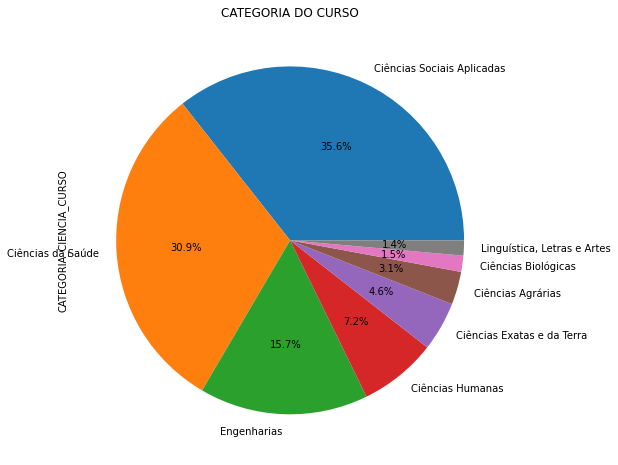

In [ ]:
plot = df1['CATEGORIA_CIENCIA_CURSO'].value_counts(normalize = True).plot.pie(autopct='%1.1f%%',figsize=(8, 8))
plot.set_title("CATEGORIA DO CURSO")

##Analisando os valores por tipo de escola de origem

In [ ]:
df1.ST_ENSINO_MEDIO_ESCOLA_PUBLICA.value_counts()

S    61801
N    23365
P     7776
Name: ST_ENSINO_MEDIO_ESCOLA_PUBLICA, dtype: int64

Text(0.5, 1.0, 'Origem ensino médio')

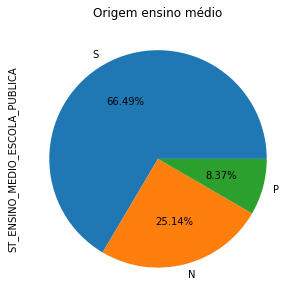

In [ ]:
#pd.set_option('display.float_format', '{:.2%}'.format)
#df1['ST_ENSINO_MEDIO_ESCOLA_PUBLICA'].value_counts(normalize = True)

plot = df1['ST_ENSINO_MEDIO_ESCOLA_PUBLICA'].value_counts(normalize = True).plot.pie(y='mass',autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Origem ensino médio")

##Analisando os valores por Sexo

In [ ]:
df1.DS_SEXO.value_counts()

Feminino     54237
Masculino    38705
Name: DS_SEXO, dtype: int64

Text(0.5, 1.0, 'Sexo dos alunos')

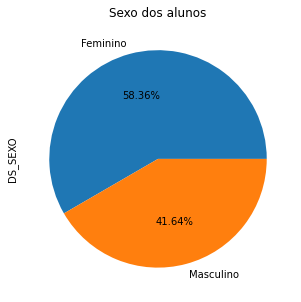

In [ ]:
plot = df1['DS_SEXO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Sexo dos alunos")

##Analisando os valores por Instituição de Ensino superior

In [ ]:
pd.set_option('display.max_rows', 987)
df1.NO_IES.value_counts()

PONTIFÍCIA UNIVERSIDADE CATÓLICA DE MINAS GERAIS                                                        2929
UNIVERSIDADE PAULISTA                                                                                   2222
UNIVERSIDADE ESTÁCIO DE SÁ                                                                              2062
UNIVERSIDADE DE CUIABÁ                                                                                  1900
UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUAI E DAS MISSÕES                                           1757
UNIVERSIDADE DE FORTALEZA                                                                               1643
UNIVERSIDADE DE SANTA CRUZ DO SUL                                                                       1485
UNIVERSIDADE DE PASSO FUNDO                                                                             1404
CENTRO UNIVERSITÁRIO UNA                                                                                1365
UNIVERSIDADE PARANA

In [ ]:
pd.reset_option("^display")

##Analisando os valores por município da instituição

In [ ]:
pd.set_option('display.max_rows', 347)
df1.NO_MUNICIPIO.value_counts()

Belo Horizonte              10067
São Paulo                    7159
Valinhos                     4481
Fortaleza                    3997
Rio de Janeiro               3831
Salvador                     3482
Curitiba                     2410
Cuiabá                       1983
Santo Ângelo                 1757
Porto Alegre                 1711
Passo Fundo                  1566
Santa Cruz do Sul            1549
Brasília                     1427
Teresina                     1369
Umuarama                     1339
Natal                        1215
Recife                       1172
Canoas                       1082
Montes Claros                1060
Silvânia                      987
Aracaju                       983
João Pessoa                   979
Goiânia                       904
Maringá                       890
Presidente Prudente           875
Lajeado                       718
Belém                         700
Lauro de Freitas              679
Juazeiro do Norte             610
Vitória       

In [ ]:
pd.reset_option("^display")

##Analisando os valores por presença de deficiência

In [ ]:
df1.ST_DEFICIENCIA.value_counts()

N    92401
S      541
Name: ST_DEFICIENCIA, dtype: int64

Text(0.5, 1.0, 'Presença de deficiência no aluno')

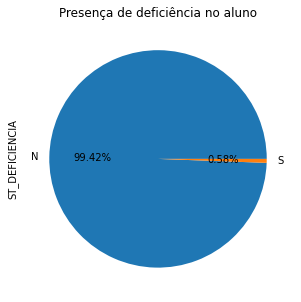

In [ ]:
plot = df1['ST_DEFICIENCIA'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Presença de deficiência no aluno")

##Analisando os valores por raça do estudante

In [ ]:
df1.DS_RACA_COR.value_counts()

Branco     55133
Pardo      28157
Negro       7375
Amarelo     2121
Índio        156
Name: DS_RACA_COR, dtype: int64

Text(0.5, 1.0, 'Distribuição racial dos estudantes')

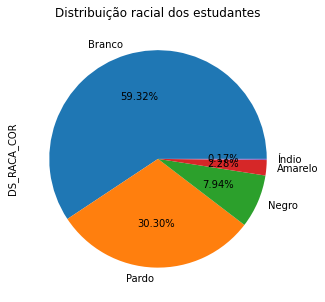

In [ ]:
plot = df1['DS_RACA_COR'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição racial dos estudantes")

##Analise do agente financeiro

In [ ]:
df1.NO_AGENTE_FINANCEIRO.value_counts()

Caixa Econômica Federal    77214
Banco do Brasil            15728
Name: NO_AGENTE_FINANCEIRO, dtype: int64

Text(0.5, 1.0, 'Distribuição dos agentes financeiros')

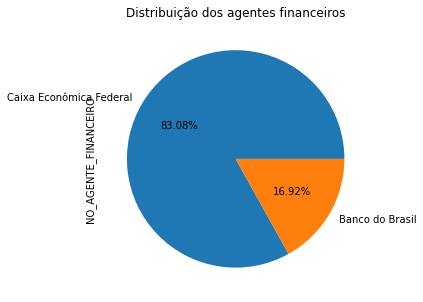

In [ ]:
plot = df1['NO_AGENTE_FINANCEIRO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos agentes financeiros")

##Analise dos estados cívies dos estudantes

In [ ]:
df1.DS_ESTADO_CIVIL.value_counts()

Solteiro         77736
Casado           10478
União estável     2281
Divorciado        1389
Separado           948
Viúvo              110
Name: DS_ESTADO_CIVIL, dtype: int64

Text(0.5, 1.0, 'Distribuição dos estados cívies dos estudantes')

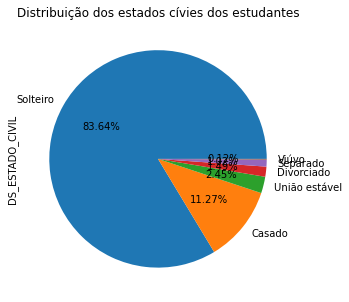

In [ ]:
plot = df1['DS_ESTADO_CIVIL'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos estados cívies dos estudantes")

##Analise da periocidade de pagamento do curso

In [ ]:
df1.DS_PERIODICIDADE_CUR.value_counts()

Semestral     87472
Anual          5412
Trimestral       58
Name: DS_PERIODICIDADE_CUR, dtype: int64

Text(0.5, 1.0, 'Distribuição da periocidade de pagamento do curso')

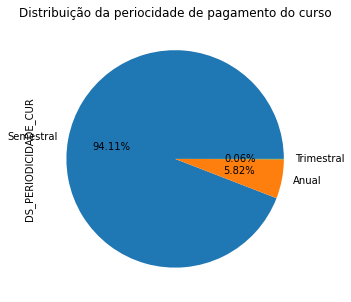

In [ ]:
plot = df1['DS_PERIODICIDADE_CUR'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição da periocidade de pagamento do curso")

##Analise da temporalidade dos pagamentos

In [ ]:
df1.NU_ANO_PROC.value_counts()

2011    92942
Name: NU_ANO_PROC, dtype: int64

In [ ]:
df1ComLinhasDuplicads.NU_MES_PROC.value_counts()

7    195432
6    179080
5     97742
4     78846
3     14562
2     10452
Name: NU_MES_PROC, dtype: int64

Text(0.5, 1.0, 'Distribuição dos meses de pagamento')

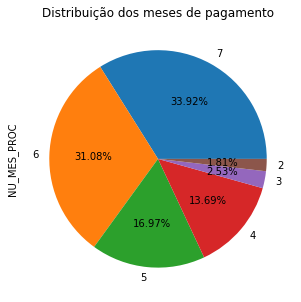

In [ ]:
plot = df1ComLinhasDuplicads['NU_MES_PROC'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos meses de pagamento")

agora analisando a temporalidade do que vai pagar

In [ ]:
df1ComLinhasDuplicads.NU_MES.value_counts()

1     85684
5     85684
4     85684
2     85684
3     85684
6     85684
8     10335
7     10335
12    10335
9     10335
10    10335
11    10335
Name: NU_MES, dtype: int64

Text(0.5, 1.0, 'Distribuição dos meses de pagamento')

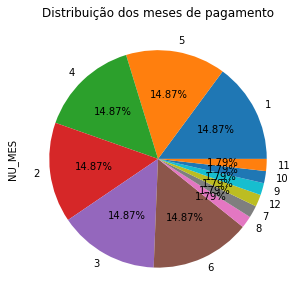

In [ ]:
plot = df1ComLinhasDuplicads['NU_MES'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos meses de pagamento")

In [ ]:
df1.NU_SEMESTRE.value_counts()

1    82745
2    10197
Name: NU_SEMESTRE, dtype: int64

Text(0.5, 1.0, 'Distribuição dos semestres referentes ao pagamento')

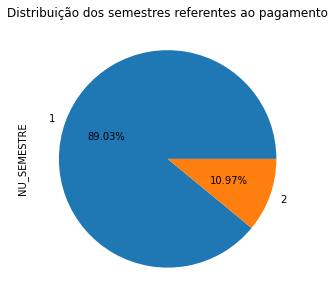

In [ ]:
plot = df1['NU_SEMESTRE'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos semestres referentes ao pagamento")

In [ ]:
df1ComLinhasDuplicads.NU_SEMESTRE.value_counts()

1    514104
2     62010
Name: NU_SEMESTRE, dtype: int64

Text(0.5, 1.0, 'Distribuição dos semestres referentes ao pagamento')

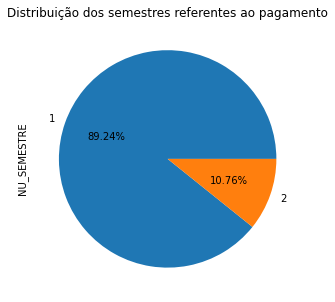

In [ ]:
plot = df1ComLinhasDuplicads['NU_SEMESTRE'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos semestres referentes ao pagamento")

In [ ]:
df1ComLinhasDuplicads.NU_ANO.value_counts()

2011    514062
2010     62052
Name: NU_ANO, dtype: int64

Text(0.5, 1.0, 'Distribuição dos anos referentes ao pagamento')

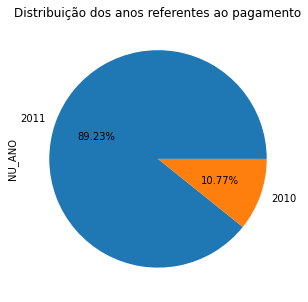

In [ ]:
plot = df1ComLinhasDuplicads['NU_ANO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos anos referentes ao pagamento")

##Analisando os tipos de financeamentos

In [ ]:
df1.TP_FIANCA.value_counts()

N    74177
F    16260
S     2505
Name: TP_FIANCA, dtype: int64

Text(0.5, 1.0, 'Distribuição do tipo de financeamento')

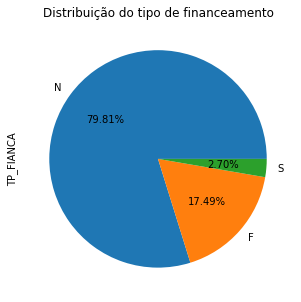

In [ ]:
plot = df1['TP_FIANCA'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição do tipo de financeamento")

##Analise dos tipos de cursos

In [ ]:
df1.DS_TIPO_CURSO.value_counts()

Bacharelado     82542
Licenciatura     6546
Tecnológico      3806
Sequencial         48
Name: DS_TIPO_CURSO, dtype: int64

Text(0.5, 1.0, 'Distribuição dos tipos de cursos')

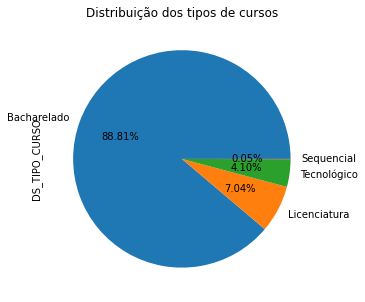

In [ ]:
plot = df1['DS_TIPO_CURSO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos tipos de cursos")

##Informações extras 

In [ ]:
df1.CO_PROCESSO.value_counts()

49    25896
52    25323
53    19563
51    17990
48     2427
44     1742
50        1
Name: CO_PROCESSO, dtype: int64

In [ ]:
df1.NU_ANO_EXERCICIO_INSC.value_counts()

2011.0    63969
2010.0    28972
2012.0        1
Name: NU_ANO_EXERCICIO_INSC, dtype: int64

In [ ]:
df1.NU_PERCENTUAL_PROUNI.value_counts()

0.0     86912
50.0     6019
25.0       11
Name: NU_PERCENTUAL_PROUNI, dtype: int64

In [ ]:
df1.NU_PERCENT_SOLICITADO_FINANC.value_counts()

100.0    55450
50.0     17600
75.0     10207
70.0      2987
60.0      2170
80.0      2112
90.0       757
65.0       595
85.0       555
55.0       337
95.0       170
51.0         1
67.0         1
Name: NU_PERCENT_SOLICITADO_FINANC, dtype: int64

In [ ]:
df1.VL_REPASSE.value_counts()

4482.00      65
347356.00    49
74616.00     35
4686.00      31
5418.00      28
             ..
76434.69      1
17031.54      1
15938.03      1
8289.21       1
4188.13       1
Name: VL_REPASSE, Length: 80419, dtype: int64

In [ ]:
df1.VL_PERC_FINANCIAMENTO.value_counts()

100.0    55450
50.0     17600
75.0     10207
70.0      2987
60.0      2170
80.0      2112
90.0       757
65.0       595
85.0       555
55.0       337
95.0       170
51.0         1
67.0         1
Name: VL_PERC_FINANCIAMENTO, dtype: int64

In [ ]:
df1.QT_SEMESTRE_FINANCIADO.value_counts()

10.0    24047
8.0     21464
6.0     10120
9.0      8878
7.0      8085
4.0      6181
5.0      5276
12.0     3166
3.0      2577
2.0      1690
11.0     1235
1.0       166
15.0       31
14.0       17
13.0        7
16.0        2
Name: QT_SEMESTRE_FINANCIADO, dtype: int64

##Analise do valor repassado

###Analise do valor repassado, utilizando a metrica VL_REPASSE

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df1.VL_REPASSE.sum()

3631187803.12

In [ ]:
df1.groupby('SG_UF').sum()['VL_REPASSE'].sort_values(ascending=False)

SG_UF
SP   776790135.280
MG   644403548.090
RS   401206916.630
PR   253209699.380
CE   239912203.270
BA   184782238.410
RJ   176110201.840
SC   135960550.800
GO   119375222.520
MT   110921742.580
ES   104013479.490
PB    77097596.600
PE    66435500.390
PI    66062959.560
DF    47040851.140
RO    39660093.040
PA    39640485.770
SE    38358595.440
RN    35680544.390
MS    17940998.970
TO    17677878.080
AC    13347681.090
AL    10903305.430
MA     6628721.410
AM     5364039.770
AP     1389105.180
RR     1273508.570
Name: VL_REPASSE, dtype: float64

In [ ]:
df1_vl_estados_interativo = df1.groupby('SG_UF').sum()['VL_REPASSE'].sort_values(ascending=False)

data_por_genero_interativo = [go.Bar(x=df1_vl_estados_interativo.index,
               y=df1_vl_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='Valor repassado por estado',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor por estado')

plt.show()

In [ ]:
df1.groupby('REGIAO').sum()['VL_REPASSE'].sort_values(ascending=False)

REGIAO
SUDESTE        1701317364.700
SUL             790377166.810
NORDESTE        725861664.900
CENTRO-OESTE    295278815.210
NORTE           118352791.500
Name: VL_REPASSE, dtype: float64

In [ ]:
df1_vl_regiao_interativo = df1.groupby('REGIAO').sum()['VL_REPASSE'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df1_vl_regiao_interativo.index,
               y=df1_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por região',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por região')

plt.show()

In [ ]:
df1.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VL_REPASSE'].sort_values(ascending=False)

CATEGORIA_CIENCIA_CURSO
Ciências da Saúde             1915438030.410
Ciências Sociais Aplicadas     835622851.450
Engenharias                    468205062.020
Ciências Humanas               168370361.040
Ciências Agrárias              118108538.880
Ciências Exatas e da Terra      75300361.060
Linguística, Letras e Artes     26201401.270
Ciências Biológicas             23941196.990
Name: VL_REPASSE, dtype: float64

In [ ]:
df1_vl_regiao_interativo = df1.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VL_REPASSE'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df1_vl_regiao_interativo.index,
               y=df1_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por categoria do curso',
                                 yaxis={'title':'Categoria'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por categoria')

plt.show()

In [ ]:
pd.reset_option("^display")

###Analise do valor repassado, utilizando a metrica VALOR_SEMESTRE_PAGO

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df1.VALOR_SEMESTRE_PAGO.sum()

401931317.22

In [ ]:
df1.groupby('SG_UF').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

SG_UF
SP   88822189.680
MG   72228062.760
RS   41515659.600
PR   29642204.760
CE   23781799.620
RJ   21428511.900
BA   21006677.160
MT   13832894.700
SC   13745905.440
GO   12490313.940
ES   10116771.240
PB    7852014.240
PE    7838303.760
PI    6649898.640
DF    5563782.360
PA    4162126.020
SE    3970198.500
RN    3936088.260
RO    3695538.240
MS    2585925.720
TO    2001214.920
AC    1656458.040
AL    1461438.360
MA     833214.180
AM     738847.380
AP     202696.980
RR     172580.820
Name: VALOR_SEMESTRE_PAGO, dtype: float64

In [ ]:
df1_vl_estados_interativo = df1.groupby('SG_UF').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

data_por_genero_interativo = [go.Bar(x=df1_vl_estados_interativo.index,
               y=df1_vl_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='Valor repassado por estado',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor por estado')

plt.show()

In [ ]:
df1.groupby('REGIAO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

REGIAO
SUDESTE        192595535.580
SUL             84903769.800
NORDESTE        77329632.720
CENTRO-OESTE    34472916.720
NORTE           12629462.400
Name: VALOR_SEMESTRE_PAGO, dtype: float64

In [ ]:
df1_vl_regiao_interativo = df1.groupby('REGIAO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df1_vl_regiao_interativo.index,
               y=df1_vl_regiao_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por região',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por região')

plt.show()

In [ ]:
df1.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

CATEGORIA_CIENCIA_CURSO
Ciências da Saúde             188866178.280
Ciências Sociais Aplicadas    103848787.320
Engenharias                    54700500.720
Ciências Humanas               19953151.440
Ciências Agrárias              13618548.540
Ciências Exatas e da Terra     13084919.640
Linguística, Letras e Artes     4120001.940
Ciências Biológicas             3739229.340
Name: VALOR_SEMESTRE_PAGO, dtype: float64

In [ ]:
df1_vl_regiao_interativo = df1.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df1_vl_regiao_interativo.index,
               y=df1_vl_regiao_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por categoria do curso',
                                 yaxis={'title':'Categoria'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por categoria')

plt.show()

In [ ]:
pd.reset_option("^display")

###Analise do valor repassado, utilizando a metrica VALOR_ARQUIVO_PAGO

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df1.VALOR_ARQUIVO_PAGO.sum()

415949159.22

In [ ]:
df1.groupby('SG_UF').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

SG_UF
SP   92349334.740
MG   74892122.880
RS   42584532.840
PR   30407393.100
CE   24928831.440
BA   22087561.020
RJ   22000597.980
SC   14284951.500
MT   13845637.980
GO   13025971.560
ES   10646074.440
PE    8124245.820
PB    8024445.780
PI    6811148.880
DF    5681829.360
PA    4307172.600
SE    4088037.900
RO    3969727.560
RN    3960933.360
MS    2643320.160
TO    2123290.920
AC    1684790.820
AL    1466922.840
MA     842972.520
AM     785555.220
AP     206925.180
RR     174830.820
Name: VALOR_ARQUIVO_PAGO, dtype: float64

In [ ]:
df1_vl_estados_interativo = df1.groupby('SG_UF').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

data_por_genero_interativo = [go.Bar(x=df1_vl_estados_interativo.index,
               y=df1_vl_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='Valor repassado por estado',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor por estado')

plt.show()

In [ ]:
df1.groupby('REGIAO').sum()['VL_REPASSE'].sort_values(ascending=False)

REGIAO
SUDESTE        1701317364.700
SUL             790377166.810
NORDESTE        725861664.900
CENTRO-OESTE    295278815.210
NORTE           118352791.500
Name: VL_REPASSE, dtype: float64

In [ ]:
df1_vl_regiao_interativo = df1.groupby('REGIAO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df1_vl_regiao_interativo.index,
               y=df1_vl_regiao_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por região',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por região')

plt.show()

In [ ]:
df1.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

CATEGORIA_CIENCIA_CURSO
Ciências da Saúde             196594099.620
Ciências Sociais Aplicadas    107125357.020
Engenharias                    56126854.200
Ciências Humanas               20549945.880
Ciências Agrárias              14043926.040
Ciências Exatas e da Terra     13456443.180
Linguística, Letras e Artes     4232682.540
Ciências Biológicas             3819850.740
Name: VALOR_ARQUIVO_PAGO, dtype: float64

In [ ]:
df1_vl_regiao_interativo = df1.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df1_vl_regiao_interativo.index,
               y=df1_vl_regiao_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por categoria do curso',
                                 yaxis={'title':'Categoria'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por categoria')

plt.show()

In [ ]:
pd.reset_option("^display")

#Analises de 2011.2

##Analisando os valores por estado.

In [ ]:
df10.SG_UF.value_counts()

SP    40560
MG    29792
RS    18574
PR    12631
BA    11800
RJ    10495
CE    10278
MT     8467
SC     5873
GO     4921
PE     4566
DF     3620
PI     3519
PB     3306
ES     3019
RN     2729
SE     2085
PA     1628
AL     1388
MS     1292
AC     1245
MA      907
RO      776
AM      696
AP      580
TO      455
RR      233
Name: SG_UF, dtype: int64

In [ ]:
df10_estados_interativo = df10.SG_UF.value_counts()

data_por_genero_interativo = [go.Bar(x=df10_estados_interativo.index,
               y=df10_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='quantidade de estudantes por estado',
                                 yaxis={'title':'quantidade de alunos'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='estudantes por estado')

plt.show()

##Analisando os valores por região

In [ ]:
df10.REGIAO.value_counts()

SUDESTE         83866
NORDESTE        40578
SUL             37078
CENTRO-OESTE    18300
NORTE            5613
Name: REGIAO, dtype: int64

In [ ]:
df10_regiao_interativo = df10.REGIAO.value_counts()

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df10_regiao_interativo.index,
               y=df10_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='quantidade de estudantes por região',
                                 yaxis={'title':'quantidade de alunos'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='estudantes por região')

plt.show()

##Analisando os valores por curso

In [ ]:
pd.set_option('display.max_rows', 304)
df10.DS_CURSO.value_counts()

DIREITO                                                           32397
ENFERMAGEM                                                        15810
ADMINISTRAÇÃO                                                     12393
MEDICINA                                                          10721
ENGENHARIA CIVIL                                                  10342
PSICOLOGIA                                                         7884
FISIOTERAPIA                                                       6645
CIÊNCIAS CONTÁBEIS                                                 5918
ODONTOLOGIA                                                        5763
PEDAGOGIA                                                          5348
EDUCAÇÃO FÍSICA                                                    5236
FARMÁCIA                                                           5112
ENGENHARIA DE PRODUÇÃO                                             4678
ARQUITETURA E URBANISMO                                         

In [ ]:
pd.reset_option("^display")

In [ ]:
df10_curso_interativo = df10.DS_CURSO.value_counts()

cores2 = sns.color_palette("Paired")

data_por_curso_interativo = [go.Bar(x=df10_curso_interativo.index,
               y=df10_curso_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='quantidade de estudantes por curso',
                                 yaxis={'title':'quantidade de alunos'},
                                 xaxis={'title': 'curso'}                              
                                )

fig = go.Figure(data = data_por_curso_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='estudantes por curso')

plt.show()

##Analisando os valores por categoria do curso

In [ ]:
df10.CATEGORIA_CIENCIA_CURSO.value_counts()

Ciências Sociais Aplicadas     67422
Ciências da Saúde              56151
Engenharias                    29637
Ciências Humanas               14258
Ciências Exatas e da Terra      7658
Ciências Agrárias               5052
Linguística, Letras e Artes     2641
Ciências Biológicas             2616
Name: CATEGORIA_CIENCIA_CURSO, dtype: int64

Text(0.5, 1.0, 'CATEGORIA DO CURSO')

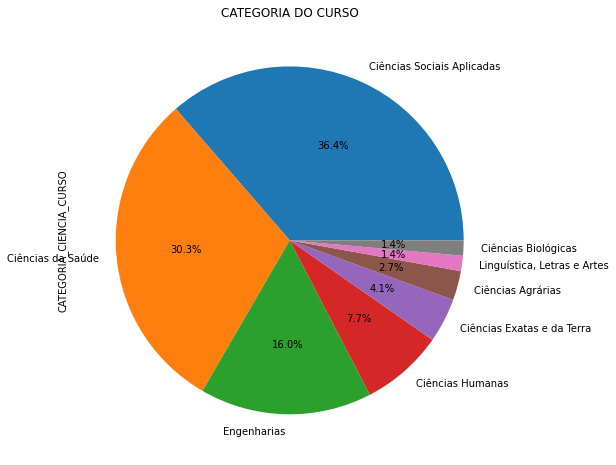

In [ ]:
plot = df10['CATEGORIA_CIENCIA_CURSO'].value_counts(normalize = True).plot.pie(autopct='%1.1f%%',figsize=(8, 8))
plot.set_title("CATEGORIA DO CURSO")

##Analisando os valores por tipo de escola de origem

In [ ]:
df10.ST_ENSINO_MEDIO_ESCOLA_PUBLICA.value_counts()

S    124624
N     44491
P     16320
Name: ST_ENSINO_MEDIO_ESCOLA_PUBLICA, dtype: int64

Text(0.5, 1.0, 'Origem ensino médio')

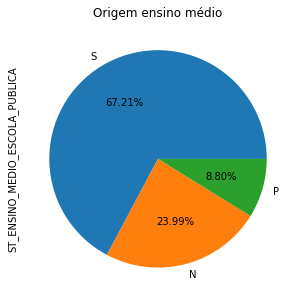

In [ ]:
plot = df10['ST_ENSINO_MEDIO_ESCOLA_PUBLICA'].value_counts(normalize = True).plot.pie(y='mass',autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Origem ensino médio")

##Analisando os valores por Sexo

In [ ]:
df10.DS_SEXO.value_counts()

Feminino     107953
Masculino     77482
Name: DS_SEXO, dtype: int64

Text(0.5, 1.0, 'Sexo dos alunos')

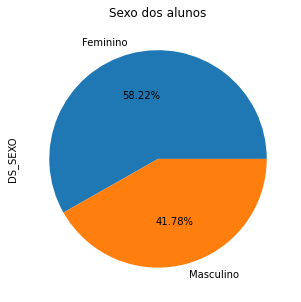

In [ ]:
plot = df10['DS_SEXO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Sexo dos alunos")

##Analisando os valores por Instituição de Ensino superior

In [ ]:
pd.set_option('display.max_rows', 1138)
df10.NO_IES.value_counts()

UNIVERSIDADE DE CUIABÁ                                                                                  4878
PONTIFÍCIA UNIVERSIDADE CATÓLICA DE MINAS GERAIS                                                        4733
UNIVERSIDADE ESTÁCIO DE SÁ                                                                              4099
UNIVERSIDADE PAULISTA                                                                                   3960
UNIVERSIDADE DE FORTALEZA                                                                               3201
CENTRO UNIVERSITÁRIO UNA                                                                                2712
UNIVERSIDADE REGIONAL INTEGRADA DO ALTO URUGUAI E DAS MISSÕES                                           2623
UNIVERSIDADE DE SANTA CRUZ DO SUL                                                                       2307
UNIVERSIDADE DE PASSO FUNDO                                                                             2246
CENTRO UNIVERSITÁRI

In [ ]:
pd.reset_option("^display")

##Analisando os valores por município da instituição

In [ ]:
pd.set_option('display.max_rows', 384)
df10.NO_MUNICIPIO.value_counts()

Belo Horizonte              19197
Valinhos                    13423
São Paulo                   13317
Rio de Janeiro               8362
Fortaleza                    7460
Salvador                     7055
Cuiabá                       5352
Curitiba                     4211
Brasília                     3620
Teresina                     3202
Porto Alegre                 3181
Natal                        2641
Recife                       2640
Santo Ângelo                 2623
Passo Fundo                  2467
Santa Cruz do Sul            2451
Canoas                       2429
Aracaju                      2044
Goiânia                      1999
João Pessoa                  1993
Montes Claros                1967
Umuarama                     1743
Silvânia                     1613
Juazeiro do Norte            1535
Lauro de Freitas             1503
Maringá                      1444
Lajeado                      1378
Belém                        1311
Presidente Prudente          1307
Rio Branco    

In [ ]:
pd.reset_option("^display")

##Analisando os valores por presença de deficiência

In [ ]:
df10.ST_DEFICIENCIA.value_counts()

N    184408
S      1027
Name: ST_DEFICIENCIA, dtype: int64

Text(0.5, 1.0, 'Presença de deficiência no aluno')

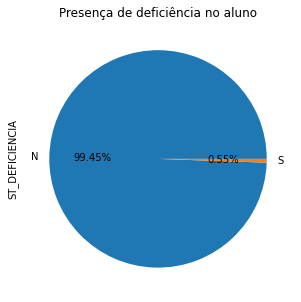

In [ ]:
plot = df10['ST_DEFICIENCIA'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Presença de deficiência no aluno")

##Analisando os valores por raça do estudante

In [ ]:
df10.DS_RACA_COR.value_counts()

Branco     104734
Pardo       59849
Negro       16081
Amarelo      4398
Índio         373
Name: DS_RACA_COR, dtype: int64

Text(0.5, 1.0, 'Distribuição racial dos estudantes')

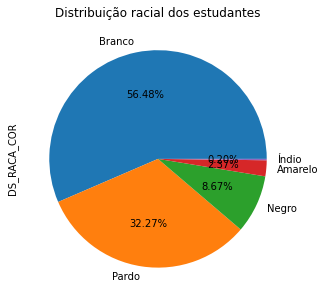

In [ ]:
plot = df10['DS_RACA_COR'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição racial dos estudantes")

##Analise do agente financeiro

In [ ]:
df10.NO_AGENTE_FINANCEIRO.value_counts()

Caixa Econômica Federal    142086
Banco do Brasil             43349
Name: NO_AGENTE_FINANCEIRO, dtype: int64

Text(0.5, 1.0, 'Distribuição dos agentes financeiros')

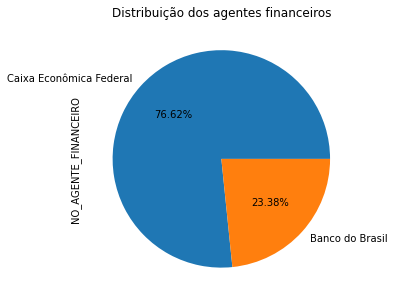

In [ ]:
plot = df10['NO_AGENTE_FINANCEIRO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos agentes financeiros")

##Analise dos estados cívies dos estudantes

In [ ]:
df10.DS_ESTADO_CIVIL.value_counts()

Solteiro         150117
Casado            24111
União estável      5207
Divorciado         3528
Separado           2199
Viúvo               273
Name: DS_ESTADO_CIVIL, dtype: int64

Text(0.5, 1.0, 'Distribuição dos estados cívies dos estudantes')

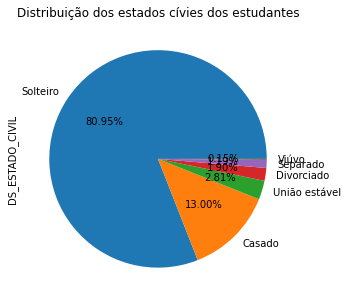

In [ ]:
plot = df10['DS_ESTADO_CIVIL'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos estados cívies dos estudantes")

##Analise da periocidade de pagamento do curso

In [ ]:
df10.DS_PERIODICIDADE_CUR.value_counts()

Semestral     177488
Anual           7870
Trimestral        77
Name: DS_PERIODICIDADE_CUR, dtype: int64

Text(0.5, 1.0, 'Distribuição da periocidade de pagamento do curso')

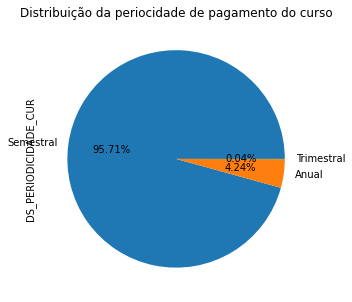

In [ ]:
plot = df10['DS_PERIODICIDADE_CUR'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição da periocidade de pagamento do curso")




























##Analise da temporalidade dos pagamentos

In [ ]:
df10.NU_ANO_PROC.value_counts()

2011    170128
2012     15307
Name: NU_ANO_PROC, dtype: int64

In [ ]:
df10ComLinhasDuplicads.NU_MES_PROC.value_counts()

12    885743
1     280595
8     144585
10    107795
9     106825
11     80892
Name: NU_MES_PROC, dtype: int64

Text(0.5, 1.0, 'Distribuição dos meses de pagamento')

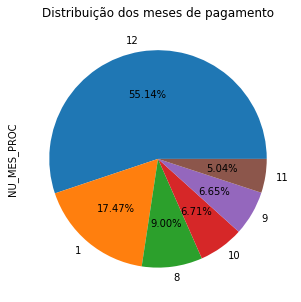

In [ ]:
plot = df10ComLinhasDuplicads['NU_MES_PROC'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos meses de pagamento")

agora analisando a temporalidade do que vai pagar

In [ ]:
df10ComLinhasDuplicads.NU_MES.value_counts()

11    199922
7     199911
8     199911
9     199911
10    199910
12    179256
6      71269
5      71269
4      71269
1      71269
3      71269
2      71269
Name: NU_MES, dtype: int64

Text(0.5, 1.0, 'Distribuição dos meses de pagamento')

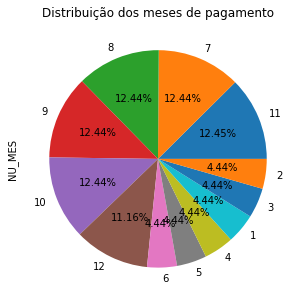

In [ ]:
plot = df10ComLinhasDuplicads['NU_MES'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos meses de pagamento")

In [ ]:
df10.NU_SEMESTRE.value_counts()

2    145656
1     39779
Name: NU_SEMESTRE, dtype: int64

Text(0.5, 1.0, 'Distribuição dos semestres referentes ao pagamento')

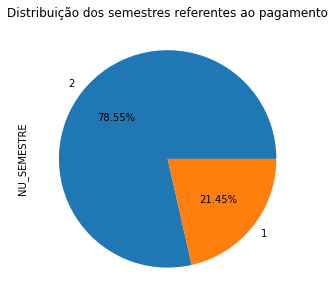

In [ ]:
plot = df10['NU_SEMESTRE'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos semestres referentes ao pagamento")

In [ ]:
df10ComLinhasDuplicads.NU_SEMESTRE.value_counts()

2    1178821
1     427614
Name: NU_SEMESTRE, dtype: int64

Text(0.5, 1.0, 'Distribuição dos semestres referentes ao pagamento')

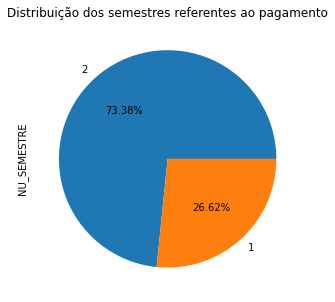

In [ ]:
plot = df10ComLinhasDuplicads['NU_SEMESTRE'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos semestres referentes ao pagamento")

In [ ]:
df10ComLinhasDuplicads.NU_ANO.value_counts()

2011    1539913
2010      66522
Name: NU_ANO, dtype: int64

Text(0.5, 1.0, 'Distribuição dos anos referentes ao pagamento')

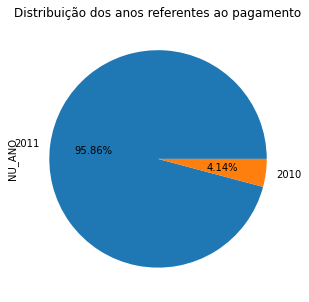

In [ ]:
plot = df10ComLinhasDuplicads['NU_ANO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos anos referentes ao pagamento")

##Analisando os tipos de financeamentos

In [ ]:
df10.TP_FIANCA.value_counts()

N    135210
F     44038
S      6187
Name: TP_FIANCA, dtype: int64

Text(0.5, 1.0, 'Distribuição do tipo de financeamento')

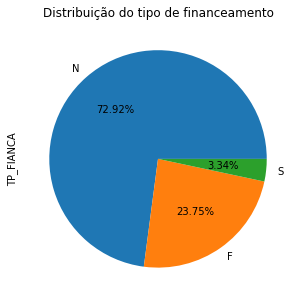

In [ ]:
plot = df10['TP_FIANCA'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição do tipo de financeamento")

##Analise dos tipos de cursos

In [ ]:
df10.DS_TIPO_CURSO.value_counts()

Bacharelado                         162412
Licenciatura                         13958
Tecnológico                           9051
Sequencial                              13
Bacharelado / Licenciatura Plena         1
Name: DS_TIPO_CURSO, dtype: int64

Text(0.5, 1.0, 'Distribuição dos tipos de cursos')

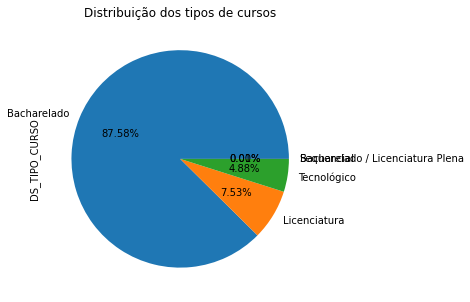

In [ ]:
plot = df10['DS_TIPO_CURSO'].value_counts(normalize = True).plot.pie(autopct='%1.2f%%',figsize=(5, 5))
plot.set_title("Distribuição dos tipos de cursos")

##Informações extras 

In [ ]:
df10.CO_PROCESSO.value_counts()

58    64463
55    29548
54    27264
56    22473
59    18533
60    15307
57     7847
Name: CO_PROCESSO, dtype: int64

In [ ]:
df10.NU_ANO_EXERCICIO_INSC.value_counts()

2011.0    130588
2010.0     54845
2014.0         1
2013.0         1
Name: NU_ANO_EXERCICIO_INSC, dtype: int64

In [ ]:
df10.NU_PERCENTUAL_PROUNI.value_counts()

0.0     175421
50.0      9996
25.0        18
Name: NU_PERCENTUAL_PROUNI, dtype: int64

In [ ]:
df10.NU_PERCENT_SOLICITADO_FINANC.value_counts()

100.0    114016
50.0      32393
75.0      19749
70.0       5945
80.0       4274
60.0       4069
90.0       1543
85.0       1213
65.0       1165
55.0        665
95.0        401
51.0          1
86.0          1
Name: NU_PERCENT_SOLICITADO_FINANC, dtype: int64

In [ ]:
df10.VL_REPASSE.value_counts()

18768.60     165
34822.40      67
324076.00     66
7908.00       57
21570.75      52
            ... 
114884.21      1
33390.58       1
35516.68       1
250453.50      1
30172.93       1
Name: VL_REPASSE, Length: 157192, dtype: int64

In [ ]:
df10.VL_PERC_FINANCIAMENTO.value_counts()

100.0    114016
50.0      32393
75.0      19749
70.0       5945
80.0       4274
60.0       4069
90.0       1543
85.0       1213
65.0       1165
55.0        665
95.0        401
51.0          1
86.0          1
Name: VL_PERC_FINANCIAMENTO, dtype: int64

In [ ]:
df10.QT_SEMESTRE_FINANCIADO.value_counts()

10.0    40763
8.0     36797
9.0     23231
7.0     22327
6.0     17666
5.0     14251
4.0     11974
3.0      7593
12.0     4936
2.0      2790
11.0     2523
1.0       552
14.0       20
13.0       11
15.0        1
Name: QT_SEMESTRE_FINANCIADO, dtype: int64

##Analise do valor repassado

###Analise do valor repassado, utilizando a metrica VL_REPASSE

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df10.VL_REPASSE.sum()

6991892803.54

In [ ]:
df10.groupby('SG_UF').sum()['VL_REPASSE'].sort_values(ascending=False)

SG_UF
SP   1475089136.600
MG   1144444189.380
RS    750926001.130
CE    449529848.320
PR    423478007.950
RJ    384905872.430
BA    369167007.710
MT    327745147.620
SC    257593916.080
GO    222089474.780
ES    159706274.100
PB    154275922.210
PI    137751064.130
PE    130123501.690
DF    114260305.190
RN     84878239.030
PA     80328946.500
SE     64499849.870
RO     53841839.290
AC     39754200.700
TO     36635120.840
AM     32824891.240
MS     28395421.750
AL     28219264.120
MA     20517417.950
AP     15170457.060
RR      5741485.870
Name: VL_REPASSE, dtype: float64

In [ ]:
df10_vl_estados_interativo = df10.groupby('SG_UF').sum()['VL_REPASSE'].sort_values(ascending=False)

data_por_genero_interativo = [go.Bar(x=df10_vl_estados_interativo.index,
               y=df10_vl_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='Valor repassado por estado',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor por estado')

plt.show()

In [ ]:
df10.groupby('REGIAO').sum()['VL_REPASSE'].sort_values(ascending=False)

REGIAO
SUDESTE        3164145472.510
NORDESTE       1438962115.030
SUL            1431997925.160
CENTRO-OESTE    692490349.340
NORTE           264296941.500
Name: VL_REPASSE, dtype: float64

In [ ]:
df10_vl_regiao_interativo = df10.groupby('REGIAO').sum()['VL_REPASSE'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df10_vl_regiao_interativo.index,
               y=df10_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por região',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por região')

plt.show()

In [ ]:
df10.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VL_REPASSE'].sort_values(ascending=False)

CATEGORIA_CIENCIA_CURSO
Ciências da Saúde             3567242886.640
Ciências Sociais Aplicadas    1672581533.260
Engenharias                    953687906.990
Ciências Humanas               353611213.960
Ciências Agrárias              209893677.640
Ciências Exatas e da Terra     136662813.080
Linguística, Letras e Artes     52595186.900
Ciências Biológicas             45617585.070
Name: VL_REPASSE, dtype: float64

In [ ]:
df10_vl_regiao_interativo = df10.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VL_REPASSE'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df10_vl_regiao_interativo.index,
               y=df10_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por categoria do curso',
                                 yaxis={'title':'Categoria'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por categoria')

plt.show()

In [ ]:
pd.reset_option("^display")

###Analise do valor repassado, utilizando a metrica VALOR_SEMESTRE_PAGO

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df10.VALOR_SEMESTRE_PAGO.sum()

775730123.22

In [ ]:
df10.groupby('SG_UF').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

SG_UF
SP   170054659.440
MG   127489606.380
RS    77317101.240
PR    47989766.640
RJ    46340973.840
CE    45659372.580
BA    42080807.040
MT    39657901.560
SC    26746874.700
GO    23559482.760
ES    15642339.180
PB    15489232.740
PE    15155984.100
PI    14324801.580
DF    13534943.520
RN     9248925.120
PA     8272199.700
SE     7137170.880
RO     5197684.380
AC     4726529.340
MS     4007584.500
TO     3944292.120
AL     3568412.760
AM     3413639.820
MA     2585427.600
AP     1921832.160
RR      662577.540
Name: VALOR_SEMESTRE_PAGO, dtype: float64

In [ ]:
df10_vl_estados_interativo = df10.groupby('SG_UF').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

data_por_genero_interativo = [go.Bar(x=df10_vl_estados_interativo.index,
               y=df10_vl_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='Valor repassado por estado',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor por estado')

plt.show()

In [ ]:
df10.groupby('REGIAO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

REGIAO
SUDESTE        359527578.840
NORDESTE       155250134.400
SUL            152053742.580
CENTRO-OESTE    80759912.340
NORTE           28138755.060
Name: VALOR_SEMESTRE_PAGO, dtype: float64

In [ ]:
df10_vl_regiao_interativo = df10.groupby('REGIAO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df10_vl_regiao_interativo.index,
               y=df10_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por região',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por região')

plt.show()

In [ ]:
df10.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

CATEGORIA_CIENCIA_CURSO
Ciências da Saúde             354864166.200
Ciências Sociais Aplicadas    207785233.320
Engenharias                   108861382.680
Ciências Humanas               42556256.700
Ciências Agrárias              23728108.920
Ciências Exatas e da Terra     22933191.120
Linguística, Letras e Artes     8019601.800
Ciências Biológicas             6982182.480
Name: VALOR_SEMESTRE_PAGO, dtype: float64

In [ ]:
df10_vl_regiao_interativo = df10.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_SEMESTRE_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df10_vl_regiao_interativo.index,
               y=df10_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por categoria do curso',
                                 yaxis={'title':'Categoria'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por categoria')

plt.show()

In [ ]:
pd.reset_option("^display")

###Analise do valor repassado, utilizando a metrica VALOR_ARQUIVO_PAGO

In [ ]:
pd.options.display.float_format = '{:.3f}'.format

In [ ]:
df10.VALOR_ARQUIVO_PAGO.sum()

1051880390.9399999

In [ ]:
df10.groupby('SG_UF').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

SG_UF
SP   225274358.960
MG   178034253.520
RS   111649478.420
PR    69856128.380
CE    61453125.820
BA    57780329.520
RJ    57594536.820
MT    47343850.340
SC    37014999.900
GO    32206899.960
PB    22247353.020
ES    21017296.780
PI    20832531.240
PE    19790903.500
DF    17081123.100
RN    13552462.060
PA    11169358.440
SE     8784488.260
RO     7440817.440
TO     6274841.120
MS     5394226.700
AC     5358908.960
AM     4546046.920
AL     3968976.700
MA     3164286.680
AP     2212879.640
RR      835928.740
Name: VALOR_ARQUIVO_PAGO, dtype: float64

In [ ]:
df10_vl_estados_interativo = df10.groupby('SG_UF').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

data_por_genero_interativo = [go.Bar(x=df10_vl_estados_interativo.index,
               y=df10_vl_estados_interativo.values,
               marker = {'color': cores,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]

configuracoes_layout = go.Layout(title='Valor repassado por estado',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'estado'}                              
                                )

fig = go.Figure(data = data_por_genero_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor por estado')

plt.show()

In [ ]:
df10.groupby('REGIAO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

REGIAO
SUDESTE        481920446.080
SUL            218520606.700
NORDESTE       211574456.800
CENTRO-OESTE   102026100.100
NORTE           37838781.260
Name: VALOR_ARQUIVO_PAGO, dtype: float64

In [ ]:
df10_vl_regiao_interativo = df10.groupby('REGIAO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df10_vl_regiao_interativo.index,
               y=df10_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por região',
                                 yaxis={'title':'Valor'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por região')

plt.show()

In [ ]:
df10.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

CATEGORIA_CIENCIA_CURSO
Ciências da Saúde             489795967.740
Ciências Sociais Aplicadas    279761925.380
Engenharias                   145239947.460
Ciências Humanas               54648883.660
Ciências Agrárias              32712983.340
Ciências Exatas e da Terra     29978064.440
Linguística, Letras e Artes    10469969.940
Ciências Biológicas             9272648.980
Name: VALOR_ARQUIVO_PAGO, dtype: float64

In [ ]:
df10_vl_regiao_interativo = df10.groupby('CATEGORIA_CIENCIA_CURSO').sum()['VALOR_ARQUIVO_PAGO'].sort_values(ascending=False)

cores2 = sns.color_palette("Paired")

data_por_regiao_interativo = [go.Bar(x=df10_vl_regiao_interativo.index,
               y=df10_vl_regiao_interativo.values,
               marker = {'color': cores2,
                         'line': {'color': '#333',
                                  'width': 2}
                        },
               opacity= 0.7,
               name='filmes'
              )
       ]


configuracoes_layout = go.Layout(title='Valor repassado por categoria do curso',
                                 yaxis={'title':'Categoria'},
                                 xaxis={'title': 'região'}                              
                                )

fig = go.Figure(data = data_por_regiao_interativo, layout=configuracoes_layout)

py.iplot(fig, filename='Valor repassado por categoria')

plt.show()

In [ ]:
pd.reset_option("^display")